In [ ]:
# data.csv是拟录取数据

In [16]:
import pandas as pd
file_path = 'data.csv'
data = pd.read_csv(file_path)

In [26]:
print(data)

    排名           初试准考证号   姓名    综合成绩  初试成绩   复试成绩
0    1  103363330104334  卢俊超  78.520   359  88.60
1    2  103363330103946  王智杰  77.992   373  83.08
2    3  103363330104004  黄祖健  77.896   388  78.34
3    4  103363330104161  李鼎睿  77.144   354  86.66
4    5  103363516812136   赵欣  76.608   344  88.32
5    6  103363413510332  张庭瑞  76.064   356  83.36
6    7  103363414710452  邹龙强  75.720   344  86.10
7    8  103363330104093  郑楷祺  74.920   350  82.30
8    9  103363621112522  岳园钊  74.680   335  86.20
9   10  103363330104235  俞飞鸿  73.448   345  80.12
10  11  103363370209158  杨若凡  73.352   346  79.58
11  12  103363322202083   刘星  73.232   356  76.28
12  13  103363330104602   祝平  73.088   325  85.22
13  14  103363321701962  林计坤  72.536   343  78.44
14  15  103363330104436  谢中校  72.056   329  81.44
15  16  103363411910044  高政博  71.736   349  74.64
16  17  103363322002022   于莉  71.424   328  80.16
17  18  103363460211749  蔡凯威  71.344   339  76.66
18  19  103363124700192  严世开  71.112   345  74.28


In [12]:
## 图像显示中文的问题
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import seaborn as sns
sns.set(font= "Kaiti",style="ticks",font_scale=1.4)
## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

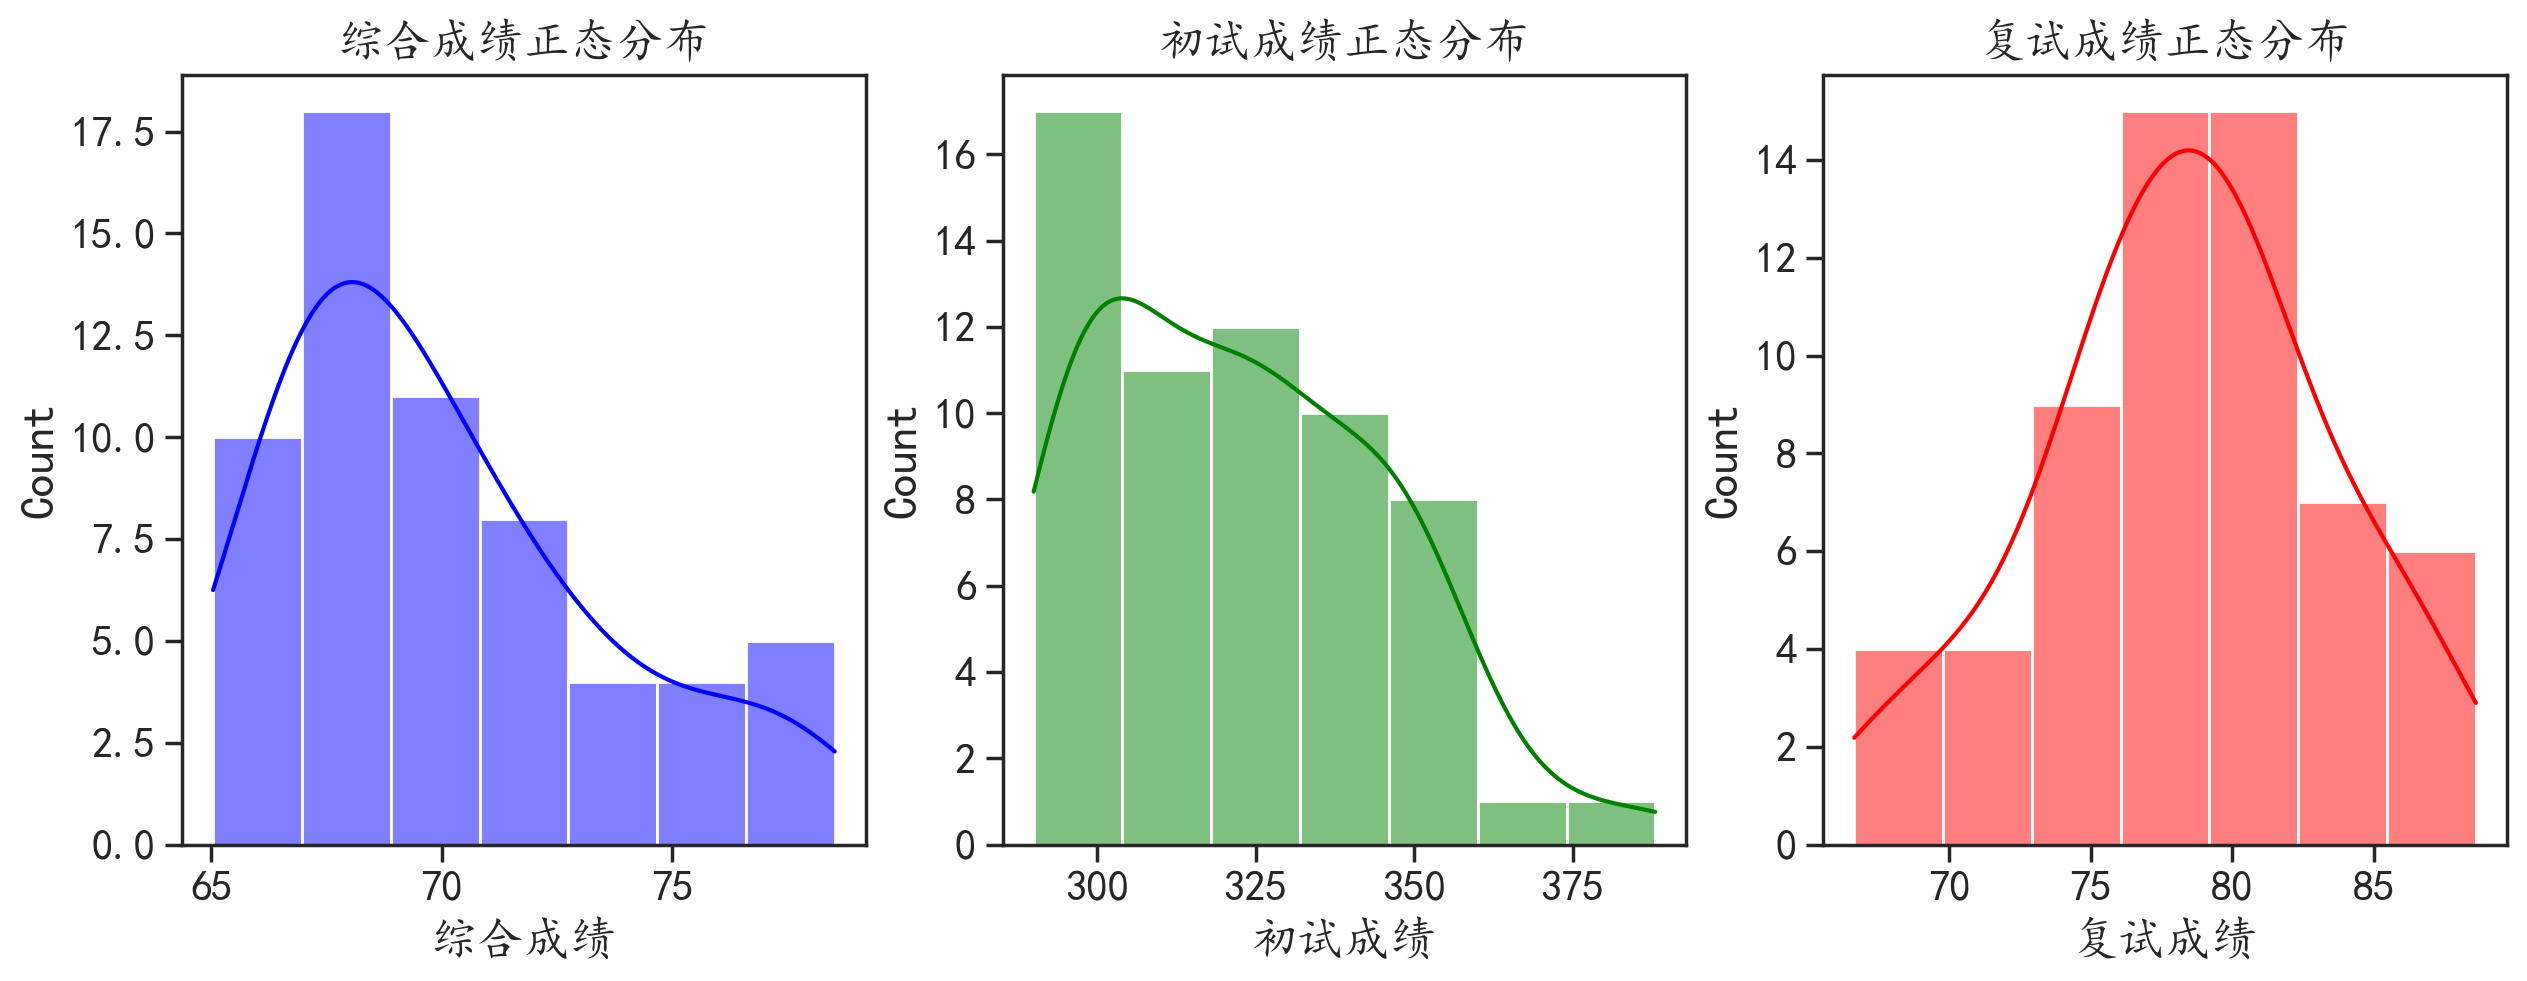

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['综合成绩'], kde=True, color="blue")
plt.title('综合成绩正态分布')

plt.subplot(1, 3, 2)
sns.histplot(data['初试成绩'], kde=True, color="green")
plt.title('初试成绩正态分布')

plt.subplot(1, 3, 3)
sns.histplot(data['复试成绩'], kde=True, color="red")
plt.title('复试成绩正态分布')

plt.show()


综合成绩范围: (65.04, 78.52), 中位数: 69.072
初试成绩范围: (290, 388), 中位数: 320.0
复试成绩范围: (66.64, 88.6), 中位数: 78.43


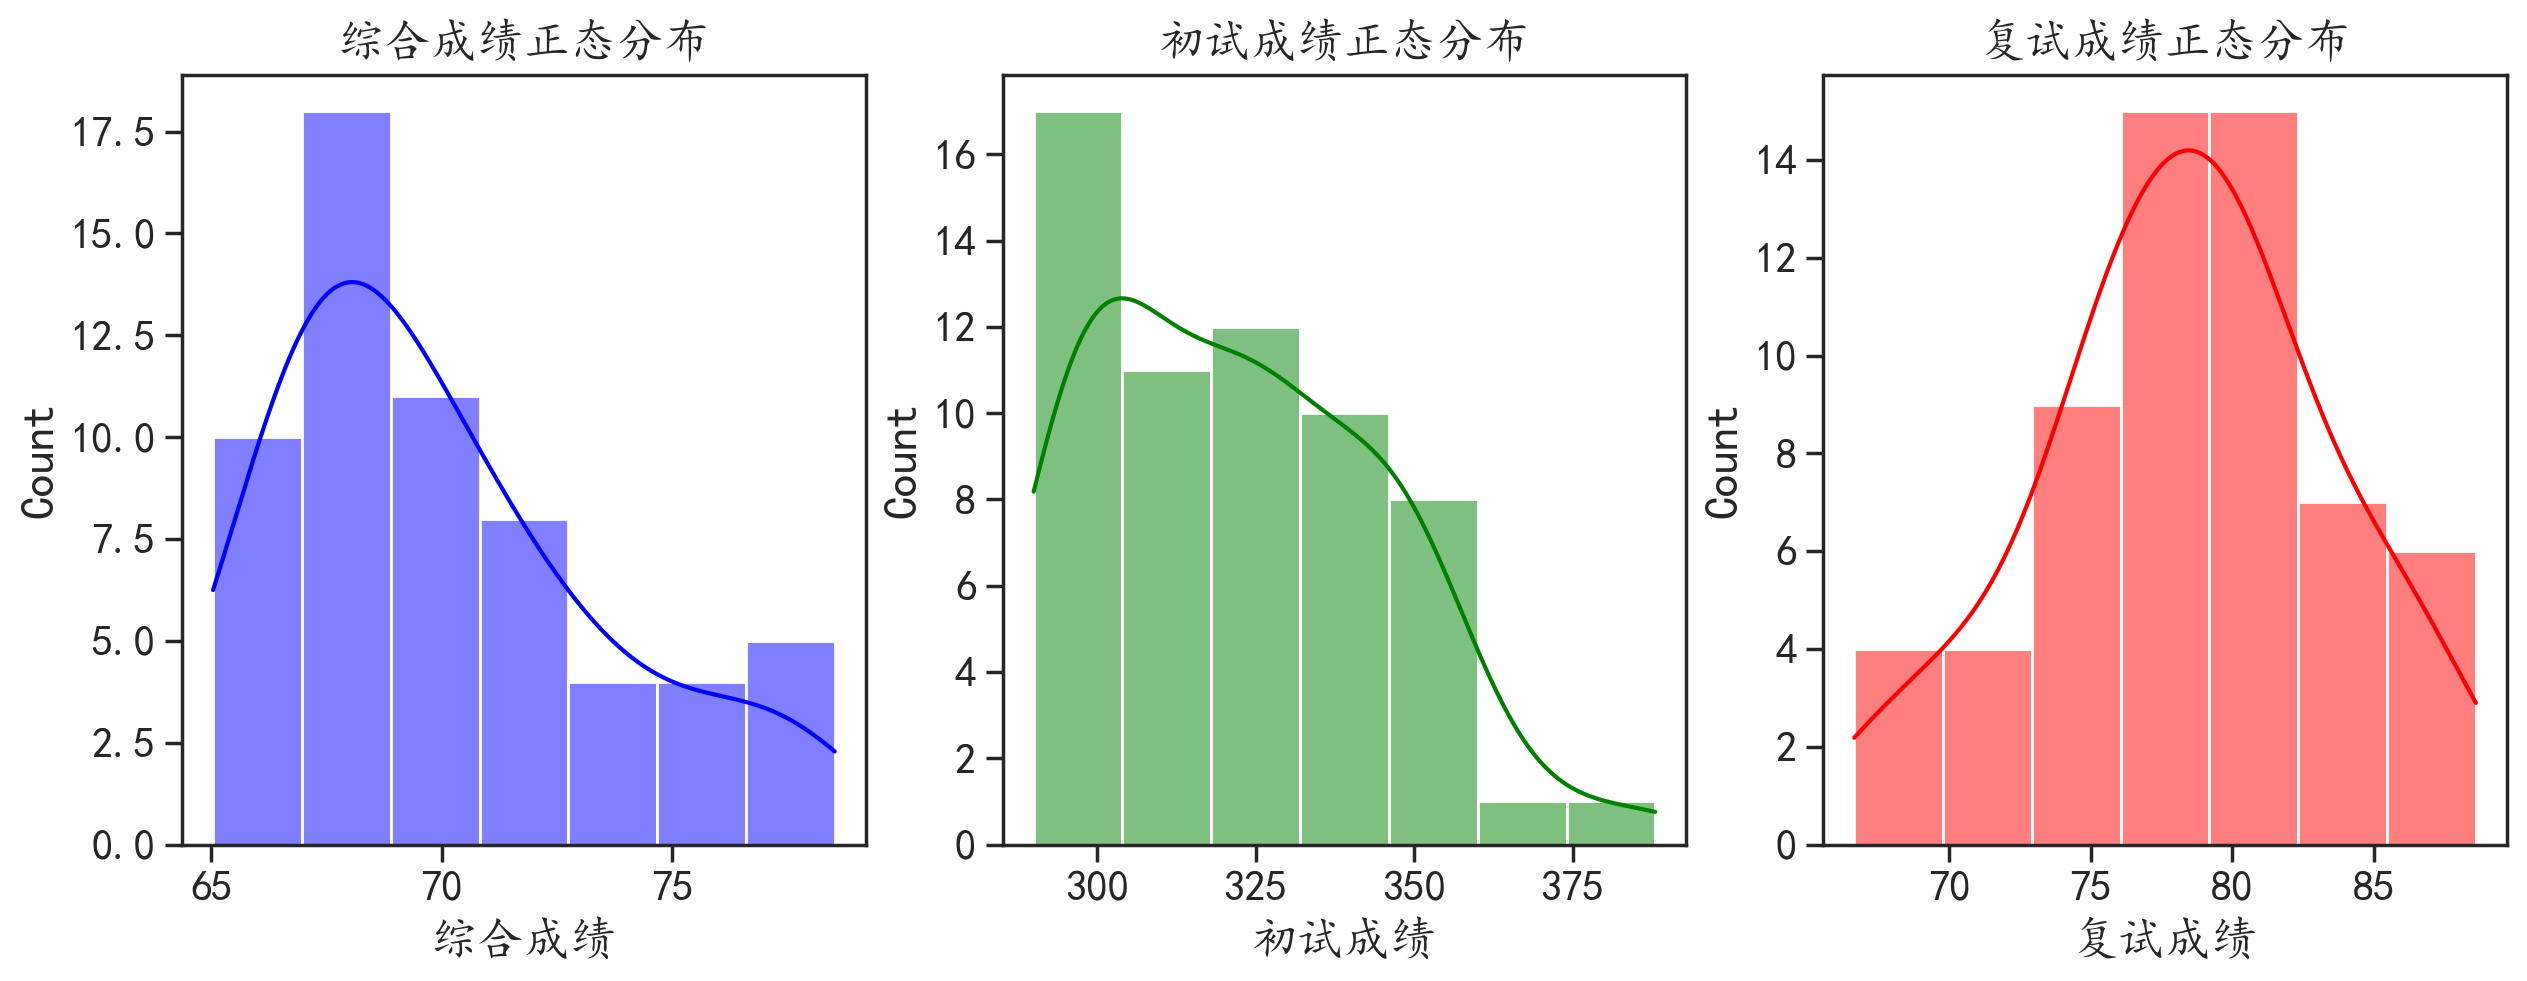

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 'data' 是一个包含您数据的 Pandas DataFrame

plt.figure(figsize=(15, 5))

# 综合成绩
plt.subplot(1, 3, 1)
sns.histplot(data['综合成绩'], kde=True, color="blue")
plt.title('综合成绩正态分布')
# 计算并打印综合成绩的范围和中位数
range_zonghe = (data['综合成绩'].min(), data['综合成绩'].max())
median_zonghe = data['综合成绩'].median()
print(f"综合成绩范围: {range_zonghe}, 中位数: {median_zonghe}")

# 初试成绩
plt.subplot(1, 3, 2)
sns.histplot(data['初试成绩'], kde=True, color="green")
plt.title('初试成绩正态分布')
# 计算并打印初试成绩的范围和中位数
range_chushi = (data['初试成绩'].min(), data['初试成绩'].max())
median_chushi = data['初试成绩'].median()
print(f"初试成绩范围: {range_chushi}, 中位数: {median_chushi}")

# 复试成绩
plt.subplot(1, 3, 3)
sns.histplot(data['复试成绩'], kde=True, color="red")
plt.title('复试成绩正态分布')
# 计算并打印复试成绩的范围和中位数
range_fushi = (data['复试成绩'].min(), data['复试成绩'].max())
median_fushi = data['复试成绩'].median()
print(f"复试成绩范围: {range_fushi}, 中位数: {median_fushi}")

plt.show()


In [16]:
correlation = data['初试成绩'].corr(data['复试成绩'])

correlation

0.07102600748775897

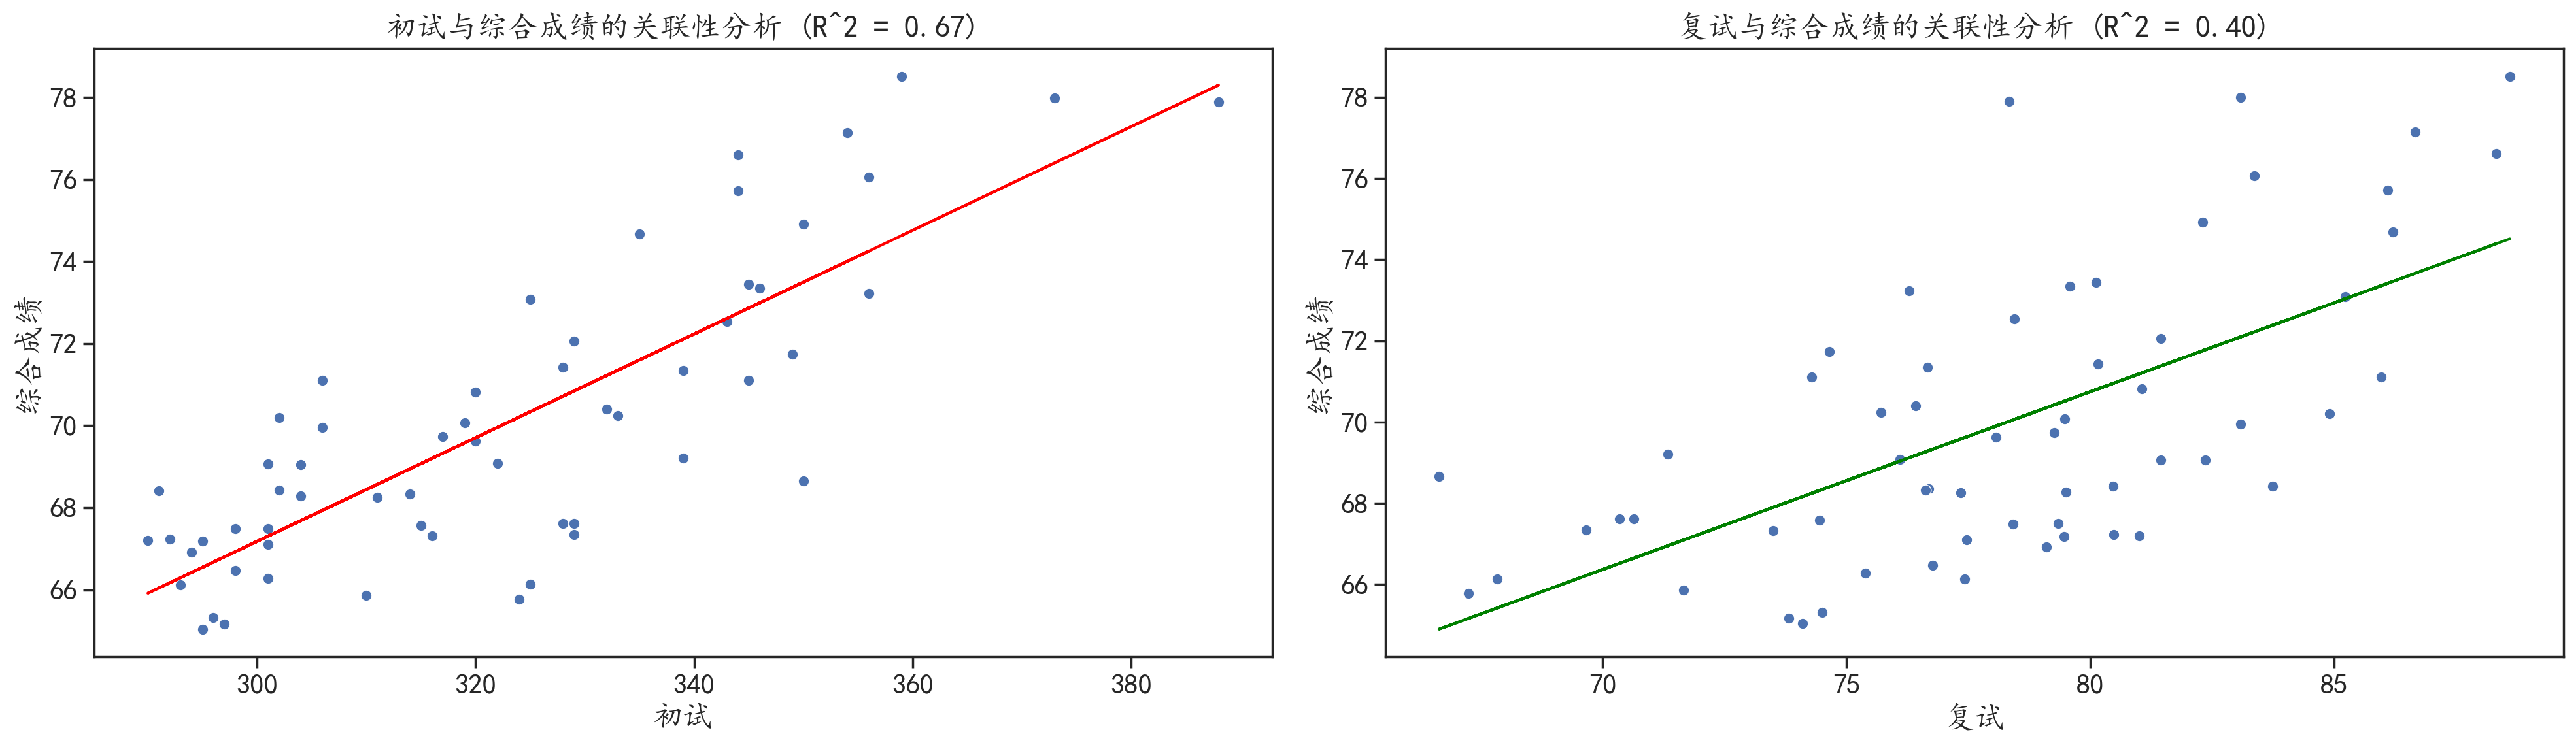

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X1 = data[['初试成绩']]
y1 = data['综合成绩']
model1 = LinearRegression()
model1.fit(X1, y1)
y_pred1 = model1.predict(X1)

X2 = data[['复试成绩']]
y2 = data['综合成绩']
model2 = LinearRegression()
model2.fit(X2, y2)
y_pred2 = model2.predict(X2)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

r2_score1 = r2_score(y1, y_pred1)
r2_score2 = r2_score(y2, y_pred2)


sns.scatterplot(x=data['初试成绩'], y=data['综合成绩'], ax=axes[0])
axes[0].plot(X1, y_pred1, color='red')
axes[0].set_title('初试与综合成绩的关联性分析 (R^2 = {:.2f})'.format(r2_score1))
axes[0].set_xlabel('初试')
axes[0].set_ylabel('综合成绩')


sns.scatterplot(x=data['复试成绩'], y=data['综合成绩'], ax=axes[1])
axes[1].plot(X2, y_pred2, color='green')
axes[1].set_title('复试与综合成绩的关联性分析 (R^2 = {:.2f})'.format(r2_score2))
axes[1].set_xlabel('复试')
axes[1].set_ylabel('综合成绩')


plt.tight_layout()


In [ ]:
# data2.txt 进复试名单

In [28]:
import pandas as pd
file_path = 'data2.txt'
data2 = pd.read_csv(file_path, sep='\s+', encoding='utf-8')
data2.columns = ['姓名', '考生编号', '报考专业代码', '报考专业名称', '政治理论', '外国语', '业务课1', '业务课2', '总分', '学习方式']
print(data2)

     姓名             考生编号  报考专业代码 报考专业名称  政治理论  外国语  业务课1  业务课2   总分 学习方式
0   王智杰  103363330103946   85405   软件工程    67   63   132   111  373  全日制
1   卢俊超  103363330104334   85405   软件工程    68   65   117   109  359  全日制
2    刘星  103363322202083   85405   软件工程    71   67   110   108  356  全日制
3   张庭瑞  103363413510332   85405   软件工程    70   74   108   104  356  全日制
4   李鼎睿  103363330104161   85405   软件工程    76   64   102   112  354  全日制
..  ...              ...     ...    ...   ...  ...   ...   ...  ...  ...
69   周瑞  103363423210896   85405   软件工程    65   54    96    77  292  全日制
70  金其涵  103363330103958   85405   软件工程    73   57    65    96  291  全日制
71  陈贇波  103363330205683   85405   软件工程    62   39   101    89  291  全日制
72  罗永康  103363361208915   85405   软件工程    73   66    67    85  291  全日制
73  袁文强  103363330205756   85405   软件工程    69   53    81    87  290  全日制

[74 rows x 10 columns]


In [33]:
# 分析每门科目的均值、最大值和最小值
subject_stats = data2[['政治理论', '外国语', '业务课1', '业务课2']].agg(['mean', 'max', 'min'])
subject_stats


,政治理论,外国语,业务课1,业务课2
mean,64.635135,59.108108,95.662162,96.391892
max,76.000000,74.000000,132.000000,122.000000
min,51.000000,39.000000,62.000000,63.000000


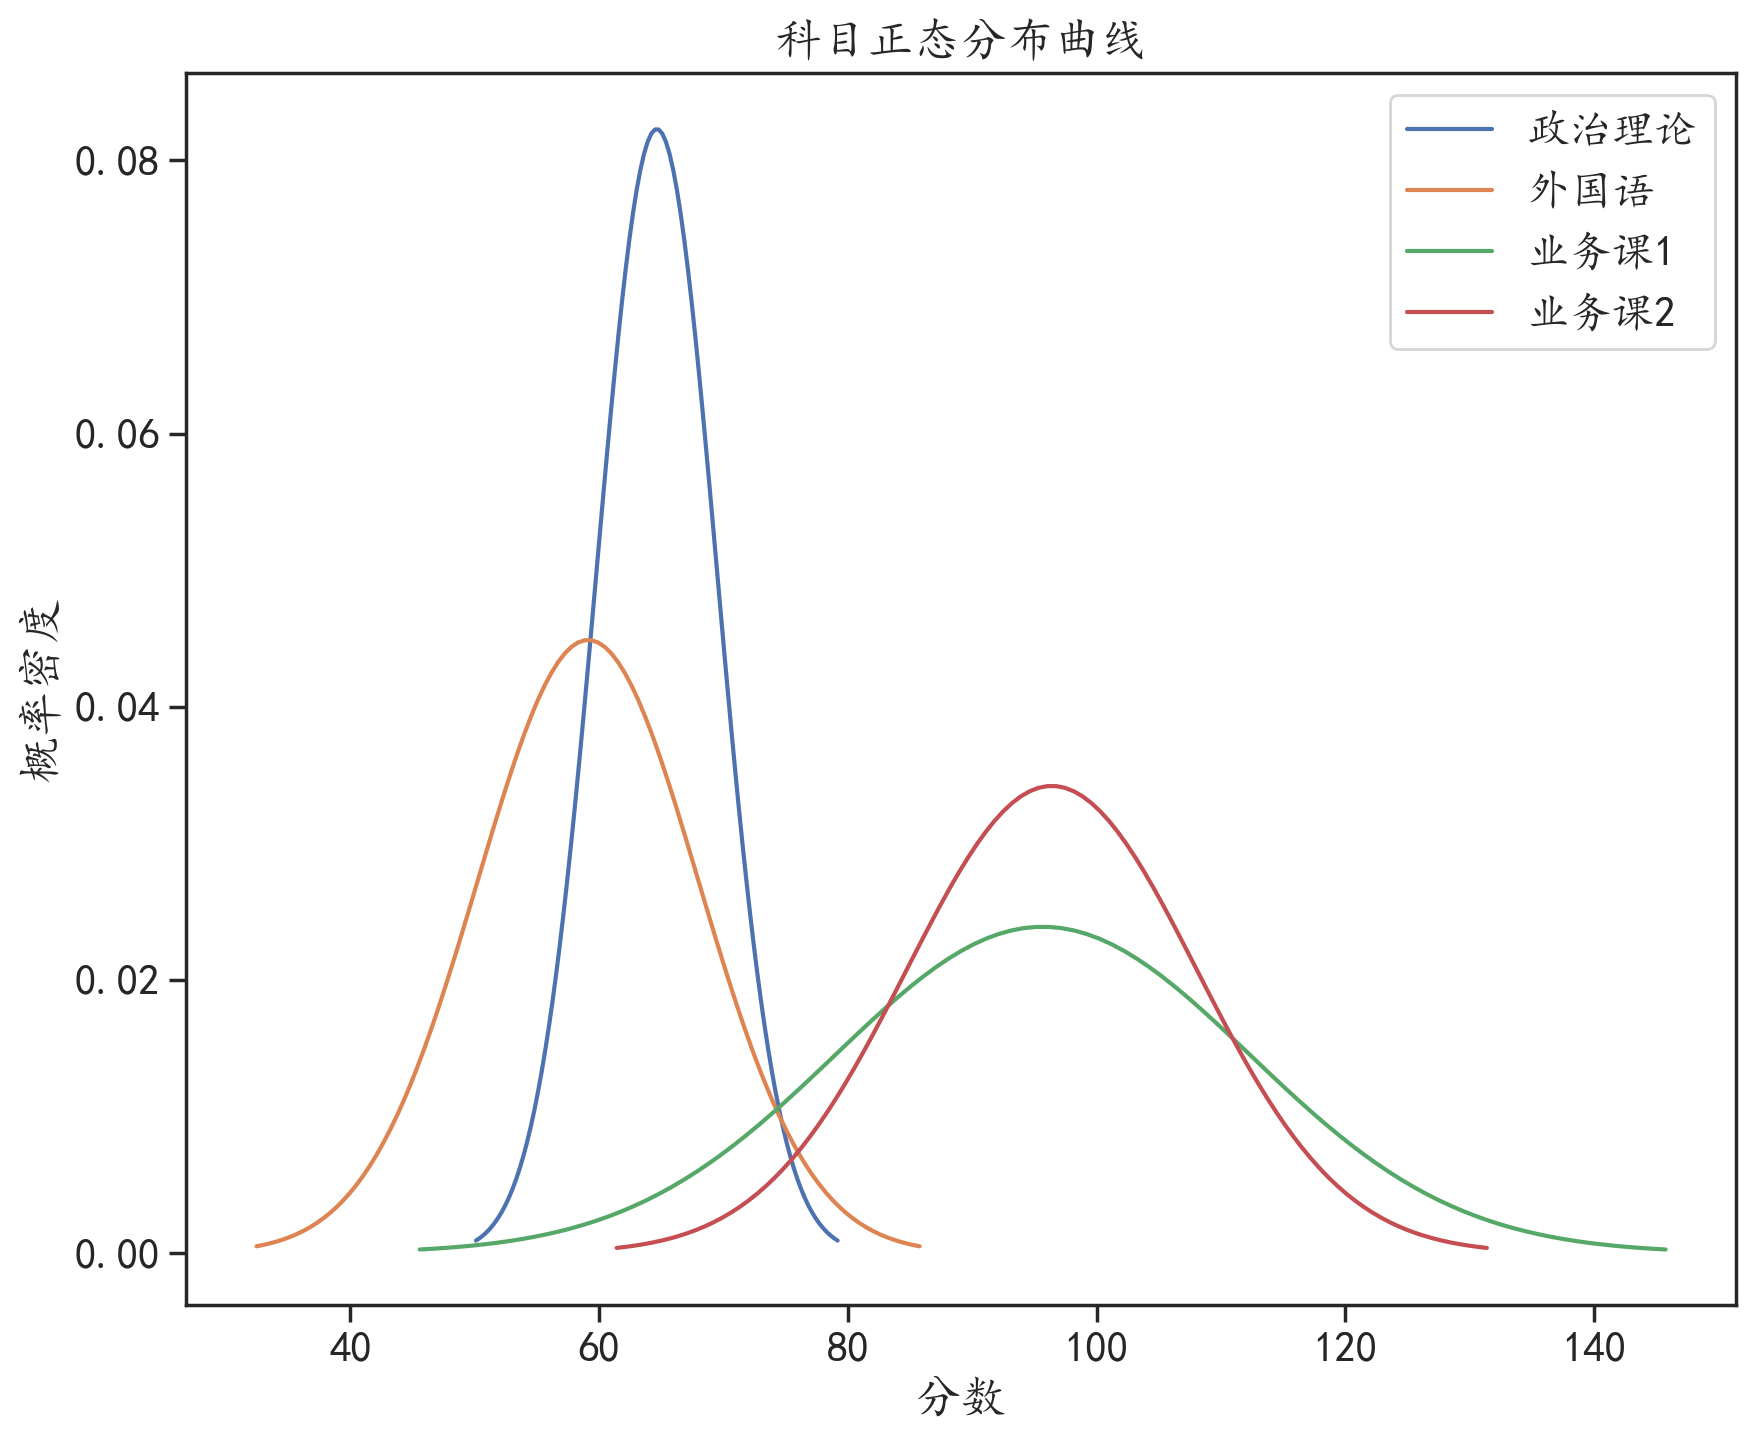

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 假设您的DataFrame名为df
# df = ...

# 计算每个科目的均值和标准差
mean_std = data2[['政治理论', '外国语', '业务课1', '业务课2']].agg(['mean', 'std'])

# 绘制正态分布曲线
plt.figure(figsize=(10, 8))

for subject in ['政治理论', '外国语', '业务课1', '业务课2']:
    # 生成正态分布数据
    data = np.linspace(mean_std[subject]['mean'] - 3*mean_std[subject]['std'], 
                       mean_std[subject]['mean'] + 3*mean_std[subject]['std'], 100)
    plt.plot(data, norm.pdf(data, mean_std[subject]['mean'], mean_std[subject]['std']), label=subject)

plt.title('科目正态分布曲线')
plt.xlabel('分数')
plt.ylabel('概率密度')
plt.legend()
plt.show()


In [37]:
from scipy.optimize import minimize
# 根据用户的情况调整分数分配策略，假设政治和外语的成绩应该比业务课低一些
# 为此，我们增加一个新的约束条件，使得政治和外语成绩低于业务课的均值
target_score = 350
# 新的目标函数，增加了权重，更加注重业务课的分数
def weighted_objective(scores):
    return np.std(scores) - 0.5 * (scores[2] + scores[3])

# 更新优化算法的约束条件
# 确保政治和外语成绩低于业务课的平均值
def subj_score_constraint(scores):
    return ((scores[2] + scores[3]) / 2) - ((scores[0] + scores[1]) / 2)

# 添加新的约束条件
subj_score_eq_constraint = {'type': 'ineq', 'fun': subj_score_constraint}

# 再次运行优化算法，考虑新的约束条件
result_adjusted = minimize(
    weighted_objective, 
    initial_guess, 
    method='trust-constr',
    bounds=bounds,
    constraints=[total_score_eq_constraint, subj_score_eq_constraint]
)

# 输出调整后的结果
if result_adjusted.success:
    optimized_scores_adjusted = result_adjusted.x
    print(f"在政治和外语成绩相对较低的前提下，为了总分达到{target_score}分，四科成绩的调整后最优分配为：")
    print(f"政治理论：{optimized_scores_adjusted[0]:.2f}分")
    print(f"外国语：{optimized_scores_adjusted[1]:.2f}分")
    print(f"业务课1：{optimized_scores_adjusted[2]:.2f}分")
    print(f"业务课2：{optimized_scores_adjusted[3]:.2f}分")
else:
    print("优化失败，可能是由于约束条件过于严格。")


在政治和外语成绩相对较低的前提下，为了总分达到350分，四科成绩的调整后最优分配为：
政治理论：69.52分
外国语：69.52分
业务课1：105.48分
业务课2：105.48分


In [38]:
# 根据用户反馈，需要进一步降低政治和外国语的分数。
# 调整目标函数，以降低政治和外国语的分数。

# 更新目标函数，增加政治和外国语的成绩对标准差的影响，从而降低它们的成绩
def adjusted_weighted_objective(scores):
    # 这里我们加大了政治和外国语成绩的负权重，使得它们在总分数中占比更小
    return np.std(scores) - scores[0] - scores[1]

# 更新优化算法的约束条件
# 政治和外国语成绩低于业务课的平均值，这里不做更改
def subj_score_constraint(scores):
    return ((scores[2] + scores[3]) / 2) - ((scores[0] + scores[1]) / 2)

# 再次进行优化
result_further_adjusted = minimize(
    adjusted_weighted_objective, 
    initial_guess, 
    method='trust-constr',
    bounds=bounds,
    constraints=[total_score_eq_constraint, subj_score_eq_constraint]
)

# 输出调整后的结果
if result_adjusted.success:
    optimized_scores_adjusted = result_adjusted.x
    print(f"在政治和外语成绩相对较低的前提下，为了总分达到{target_score}分，四科成绩的调整后最优分配为：")
    print(f"政治理论：{optimized_scores_adjusted[0]:.2f}分")
    print(f"外国语：{optimized_scores_adjusted[1]:.2f}分")
    print(f"业务课1：{optimized_scores_adjusted[2]:.2f}分")
    print(f"业务课2：{optimized_scores_adjusted[3]:.2f}分")
else:
    print("优化失败，可能是由于约束条件过于严格。")

在政治和外语成绩相对较低的前提下，为了总分达到350分，四科成绩的调整后最优分配为：
政治理论：69.52分
外国语：69.52分
业务课1：105.48分
业务课2：105.48分


In [28]:
names_data = set(data['姓名'])
names_data2 = set(data2['姓名'])

# 找出只在data中出现的姓名
names_only_in_data = names_data - names_data2

# 找出只在data2中出现的姓名
names_only_in_data2 = names_data2 - names_data

# 打印结果
print("只在录取名单中的姓名：", names_only_in_data)
print("只在复试名单中的姓名：", names_only_in_data2)

只在录取名单中的姓名： {'黄祖健'}
只在复试名单中的姓名： {'陈贇波', '姚婉佳', '戴才竣', '鲁锴', '罗永康', '周瑞', '李安俊', '鲍成毅', '黄思佳', '高文博', '丁士航', '陈曙光', '朱巍', '王磊', '徐敏'}


In [30]:
students_info = data2[data2['姓名'].isin(names_only_in_data2)]
print(students_info)

     姓名             考生编号  报考专业代码 报考专业名称  政治理论  外国语  业务课1  业务课2   总分 学习方式
48  高文博  103363330104737   85405   软件工程    69   49    79   102  299  全日制
49   鲁锴  103363330606623   85405   软件工程    74   64    73    88  299  全日制
50   徐敏  103363340707609   85405   软件工程    60   48    95    96  299  全日制
55  鲍成毅  103363321101651   85405   软件工程    62   40   107    87  296  全日制
56  李安俊  103363330306088   85405   软件工程    61   58    84    93  296  全日制
58   王磊  103363150100877   85405   软件工程    60   63   109    63  295  全日制
61  丁士航  103363410509698   85405   软件工程    69   73    75    77  294  全日制
62  姚婉佳  103363311501502   85405   软件工程    61   59    70   103  293  全日制
64  陈曙光  103363330406301   85405   软件工程    69   54   101    69  293  全日制
65  戴才竣  103363440611494   85405   软件工程    66   62    62   103  293  全日制
66   朱巍  103363321101661   85405   软件工程    70   58    97    67  292  全日制
68  黄思佳  103363350208213   85405   软件工程    68   63    74    87  292  全日制
69   周瑞  103363423210896   85405   软件工程    65   54 

In [32]:
def calculate_composite_score(prelim_score, retest_score):
    return (prelim_score / 5) * 0.6 + retest_score * 0.4

additional_data = {
    "姓名": ["高文博", "鲁锴", "徐敏", "鲍成毅", "李安俊", "王磊", "丁士航", "姚婉佳", "陈曙光", "戴才竣", "朱巍", "黄思佳", "周瑞", "陈贇波", "罗永康"],
    "初试成绩": [299, 299, 299, 296, 296, 295, 294, 293, 293, 293, 292, 292, 292, 291, 291]
}

additional_df = pd.DataFrame(additional_data)

additional_df['最低复试成绩'] = additional_df['初试成绩'].apply(lambda x: max(0, (65 - (x / 5) * 0.6) / 0.4))

additional_df


,姓名,初试成绩,最低复试成绩
0,高文博,299,72.8
1,鲁锴,299,72.8
2,徐敏,299,72.8
3,鲍成毅,296,73.7
4,李安俊,296,73.7
5,王磊,295,74.0
6,丁士航,294,74.3
7,姚婉佳,293,74.6
8,陈曙光,293,74.6
9,戴才竣,293,74.6


In [33]:

selected_prelim_scores = range(290, 391, 10)  # From 295 to 390 in steps of 5

selected_min_retest_scores = [(score, max(0, (65.04 - (score / 5) * 0.6) / 0.4)) for score in selected_prelim_scores]

selected_min_retest_scores_df = pd.DataFrame(selected_min_retest_scores, columns=['初试成绩', '最低复试成绩'])

selected_min_retest_scores_df


,初试成绩,最低复试成绩
0,290,75.6
1,300,72.6
2,310,69.6
3,320,66.6
4,330,63.6
5,340,60.6
6,350,57.6
7,360,54.6
8,370,51.6
9,380,48.6


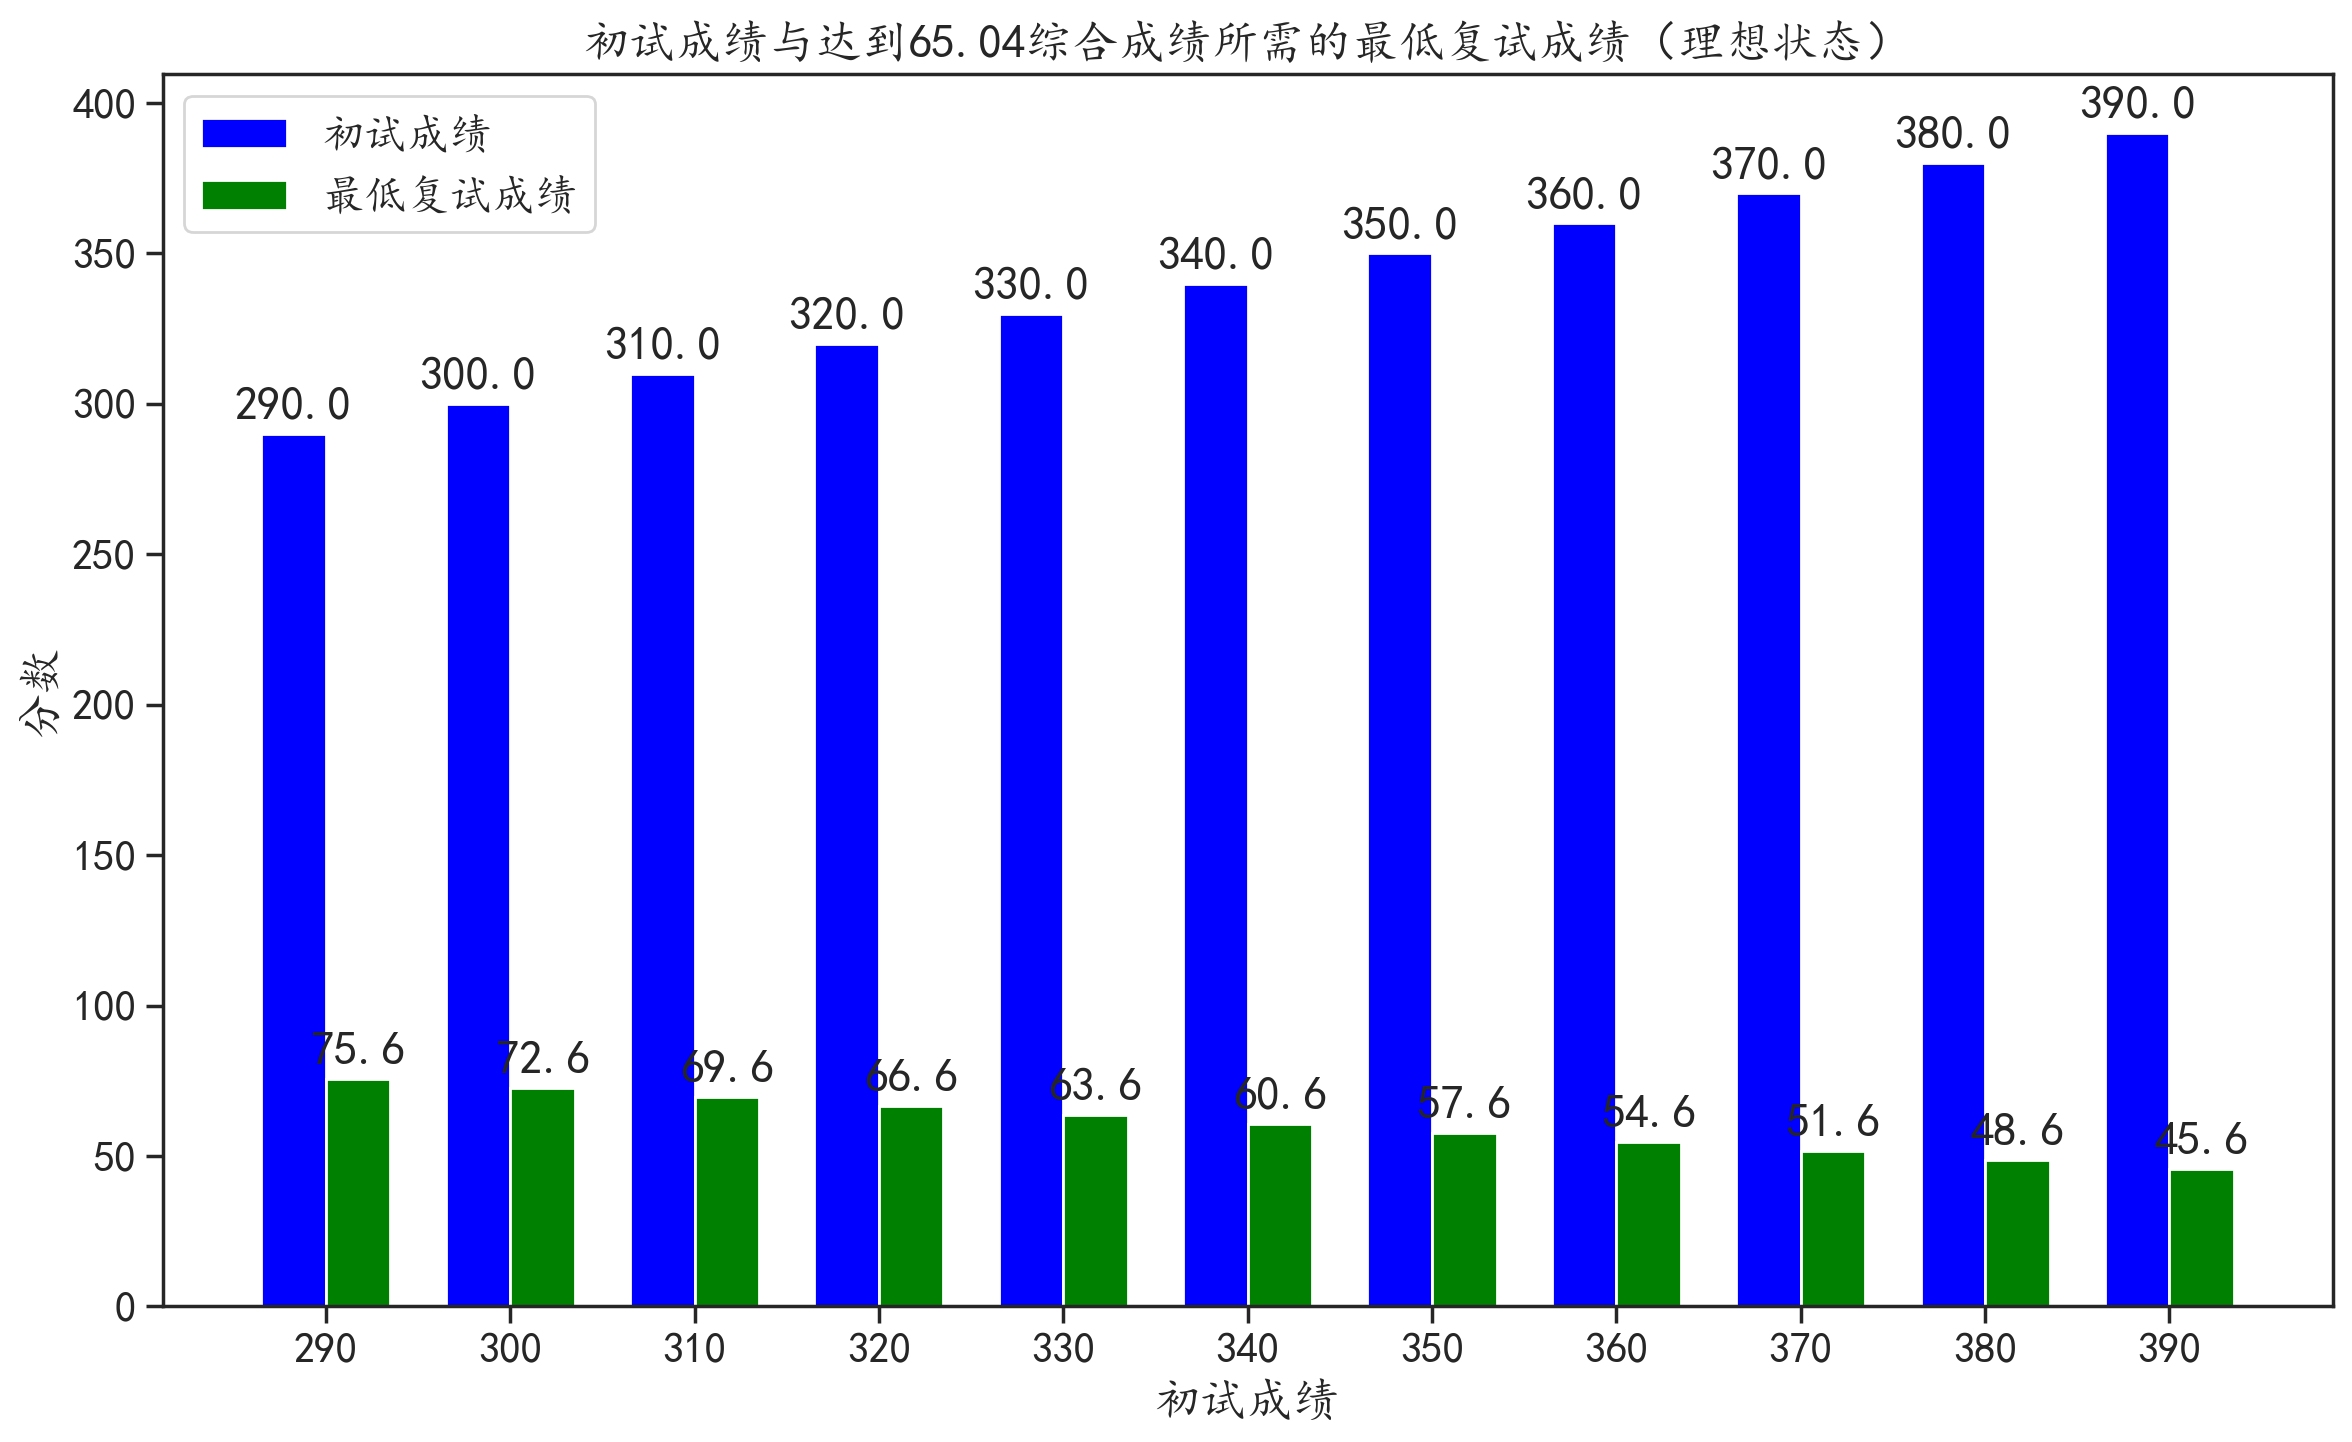

In [17]:
# Rewriting the complete code for creating a side-by-side bar chart with values on top of the bars

# Importing necessary library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data preparation
selected_prelim_scores = range(290, 391, 10)  # From 290 to 390 in steps of 10
selected_min_retest_scores = [(score, max(0, (65.04 - (score / 5) * 0.6) / 0.4)) for score in selected_prelim_scores]
selected_min_retest_scores_df = pd.DataFrame(selected_min_retest_scores, columns=['初试成绩', '最低复试成绩'])

# Extracting values for plotting
prelim_scores_list = selected_min_retest_scores_df['初试成绩'].tolist()
min_retest_scores_list = selected_min_retest_scores_df['最低复试成绩'].tolist()

# Settings for the bars
bar_width = 0.35  # width of the bars
index = np.arange(len(prelim_scores_list))

# Creating a figure
plt.figure(figsize=(14, 8))

# Creating side-by-side bar plots
bars1 = plt.bar(index, prelim_scores_list, bar_width, color='blue', label='初试成绩')
bars2 = plt.bar(index + bar_width, min_retest_scores_list, bar_width, color='green', label='最低复试成绩')

# Adding labels and title
plt.xlabel('初试成绩')
plt.ylabel('分数')
plt.title('初试成绩与达到65.04综合成绩所需的最低复试成绩（理想状态）')
plt.xticks(index + bar_width / 2, prelim_scores_list)
plt.legend()

# Function to add labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

# Adding labels to the bars
add_labels(bars1)
add_labels(bars2)

# Showing the plot
plt.show()


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 加载数据
data = pd.read_csv('data.csv')
X = data['初试成绩'].values.reshape(-1, 1)
y = data['复试成绩'].values.reshape(-1, 1)

# 数据预处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# 转换为PyTorch张量
X_train_torch = torch.tensor(X_train.astype(np.float32))
y_train_torch = torch.tensor(y_train.astype(np.float32))
X_test_torch = torch.tensor(X_test.astype(np.float32))
y_test_torch = torch.tensor(y_test.astype(np.float32))

# 创建数据加载器
train_dataset = TensorDataset(X_train_torch, y_train_torch)
train_loader = DataLoader(dataset=train_dataset, batch_size=256, shuffle=True)

# 构建神经网络模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 100)
        self.fc2 = nn.Linear(100, 80)
        self.fc3 = nn.Linear(80, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# 训练模型
num_epochs = 10000
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# 测试模型
net.eval() # 将模型设置为评估模式
with torch.no_grad():
    predictions = net(X_test_torch)
    test_loss = criterion(predictions, y_test_torch)

print(f'Test Loss: {test_loss.item()}')


Epoch 1/10000, Loss: 6194.88720703125
Epoch 2/10000, Loss: 6183.38671875
Epoch 3/10000, Loss: 6171.84228515625
Epoch 4/10000, Loss: 6160.21337890625
Epoch 5/10000, Loss: 6148.546875
Epoch 6/10000, Loss: 6136.857421875
Epoch 7/10000, Loss: 6125.11767578125
Epoch 8/10000, Loss: 6113.12255859375
Epoch 9/10000, Loss: 6100.74072265625
Epoch 10/10000, Loss: 6087.90234375
Epoch 11/10000, Loss: 6074.58349609375
Epoch 12/10000, Loss: 6060.85107421875
Epoch 13/10000, Loss: 6046.79248046875
Epoch 14/10000, Loss: 6032.33349609375
Epoch 15/10000, Loss: 6017.51220703125
Epoch 16/10000, Loss: 6002.26123046875
Epoch 17/10000, Loss: 5986.59228515625
Epoch 18/10000, Loss: 5970.40869140625
Epoch 19/10000, Loss: 5953.677734375
Epoch 20/10000, Loss: 5936.45703125
Epoch 21/10000, Loss: 5918.77783203125
Epoch 22/10000, Loss: 5900.56298828125
Epoch 23/10000, Loss: 5881.7421875
Epoch 24/10000, Loss: 5862.30322265625
Epoch 25/10000, Loss: 5842.23193359375
Epoch 26/10000, Loss: 5821.49755859375
Epoch 27/10000, L

Epoch 1/15000, Loss: 6181.88427734375
Epoch 2/15000, Loss: 6116.97314453125
Epoch 3/15000, Loss: 6054.26513671875
Epoch 4/15000, Loss: 5993.08642578125
Epoch 5/15000, Loss: 5934.494140625
Epoch 6/15000, Loss: 5876.17138671875
Epoch 7/15000, Loss: 5816.3125
Epoch 8/15000, Loss: 5754.55517578125
Epoch 9/15000, Loss: 5690.921875
Epoch 10/15000, Loss: 5625.41943359375
Epoch 11/15000, Loss: 5558.04345703125
Epoch 12/15000, Loss: 5488.783203125
Epoch 13/15000, Loss: 5417.62646484375
Epoch 14/15000, Loss: 5344.55859375
Epoch 15/15000, Loss: 5269.56884765625
Epoch 16/15000, Loss: 5192.65087890625
Epoch 17/15000, Loss: 5113.79736328125
Epoch 18/15000, Loss: 5033.0078125
Epoch 19/15000, Loss: 4950.2861328125
Epoch 20/15000, Loss: 4865.64208984375
Epoch 21/15000, Loss: 4779.0888671875
Epoch 22/15000, Loss: 4690.64599609375
Epoch 23/15000, Loss: 4600.34033203125
Epoch 24/15000, Loss: 4508.205078125
Epoch 25/15000, Loss: 4414.27783203125
Epoch 26/15000, Loss: 4318.60693359375
Epoch 27/15000, Loss: 

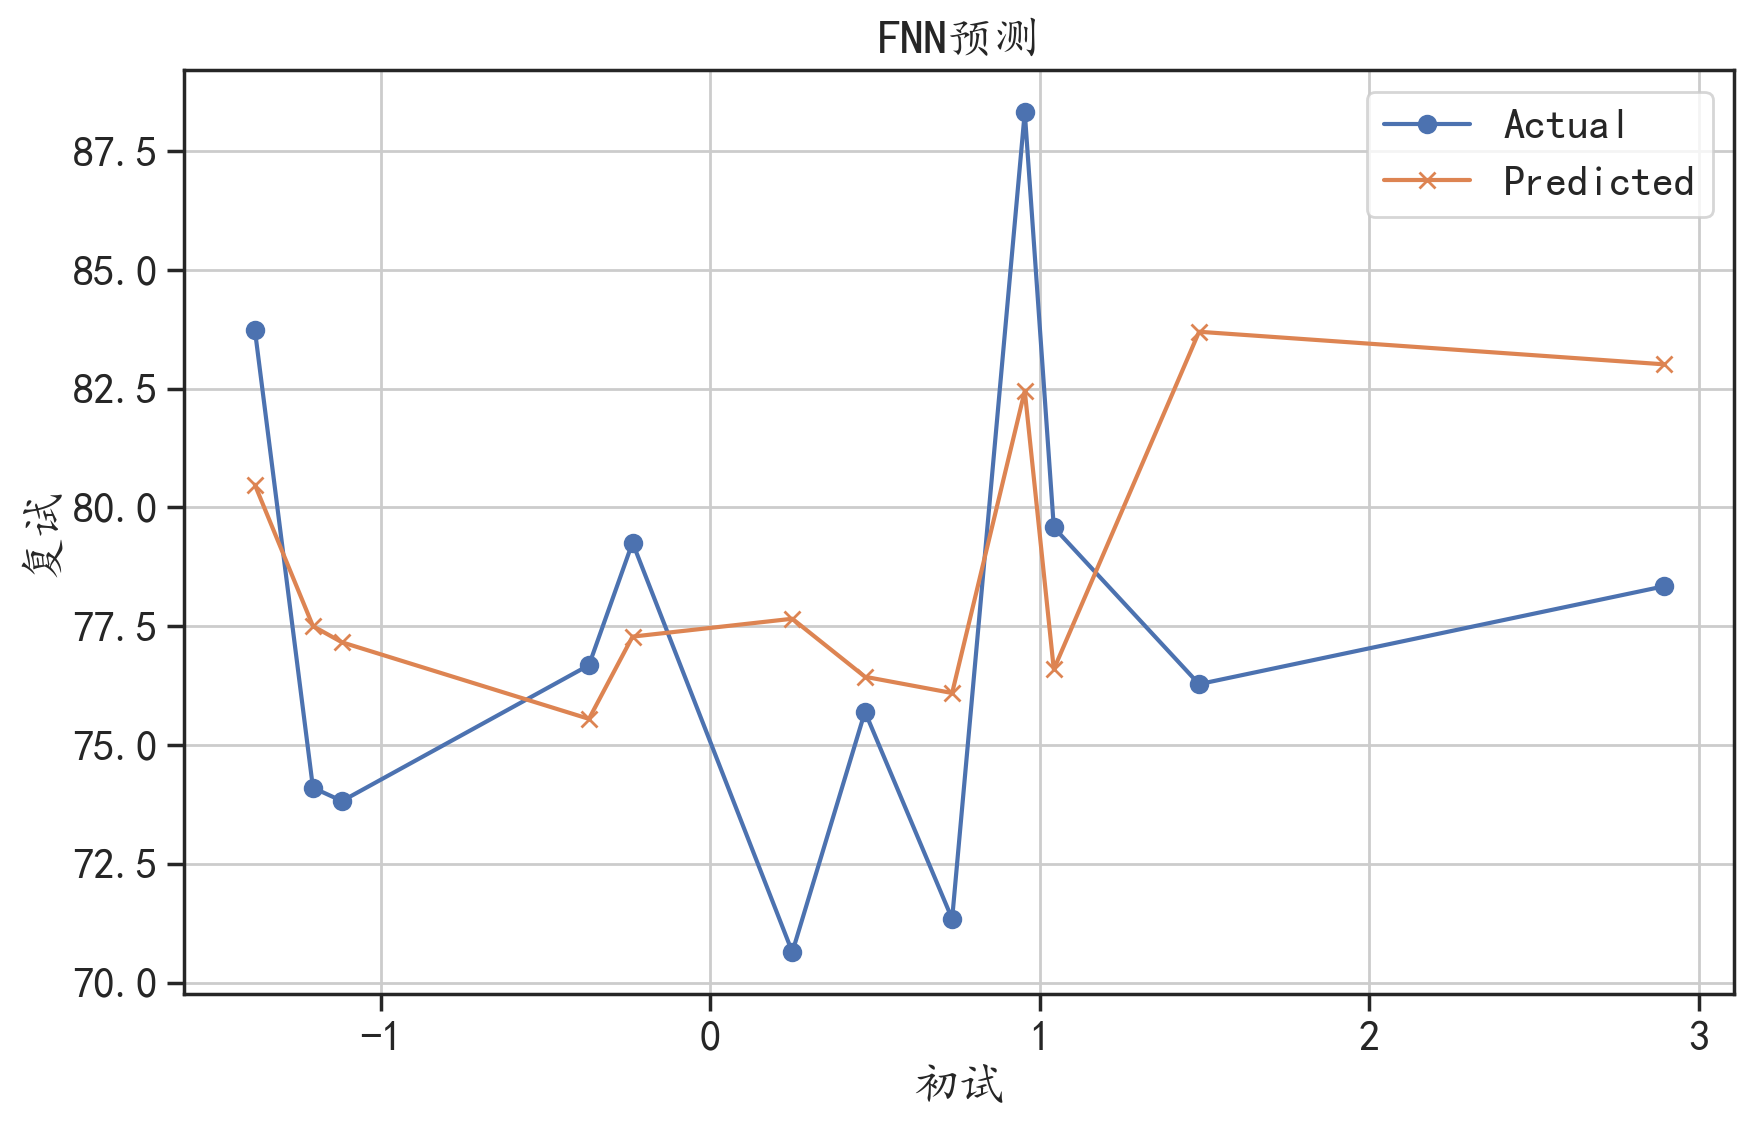

In [13]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reload the provided CSV file
file_path = 'data.csv'
data = pd.read_csv(file_path)
X = data['初试成绩'].values.reshape(-1, 1)
y = data['复试成绩'].values.reshape(-1, 1)

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Converting to PyTorch tensors
X_train_torch = torch.tensor(X_train.astype(np.float32))
y_train_torch = torch.tensor(y_train.astype(np.float32))
X_test_torch = torch.tensor(X_test.astype(np.float32))
y_test_torch = torch.tensor(y_test.astype(np.float32))

# Creating data loader
train_dataset = TensorDataset(X_train_torch, y_train_torch)
train_loader = DataLoader(dataset=train_dataset, batch_size=256, shuffle=True)

# Building neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 500)
        self.fc2 = nn.Linear(500, 80)
        self.fc3 = nn.Linear(80, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# Defining loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training the model
num_epochs = 15000
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')
# Testing the model
net.eval() # Setting the model to evaluation mode
with torch.no_grad():
    predictions = net(X_test_torch)

# Converting predictions to numpy array
predictions_np = predictions.numpy()

# Sorting the test set for better visualization
test_set_sorted = pd.DataFrame({'X_test': X_test.reshape(-1), 'y_test': y_test.reshape(-1), 'Predictions': predictions_np.reshape(-1)})
test_set_sorted.sort_values(by='X_test', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(test_set_sorted['X_test'], test_set_sorted['y_test'], label='Actual', marker='o')
plt.plot(test_set_sorted['X_test'], test_set_sorted['Predictions'], label='Predicted', marker='x')
plt.title('FNN预测')
plt.xlabel('初试')
plt.ylabel('复试')
plt.legend()
plt.grid(True)
plt.show()


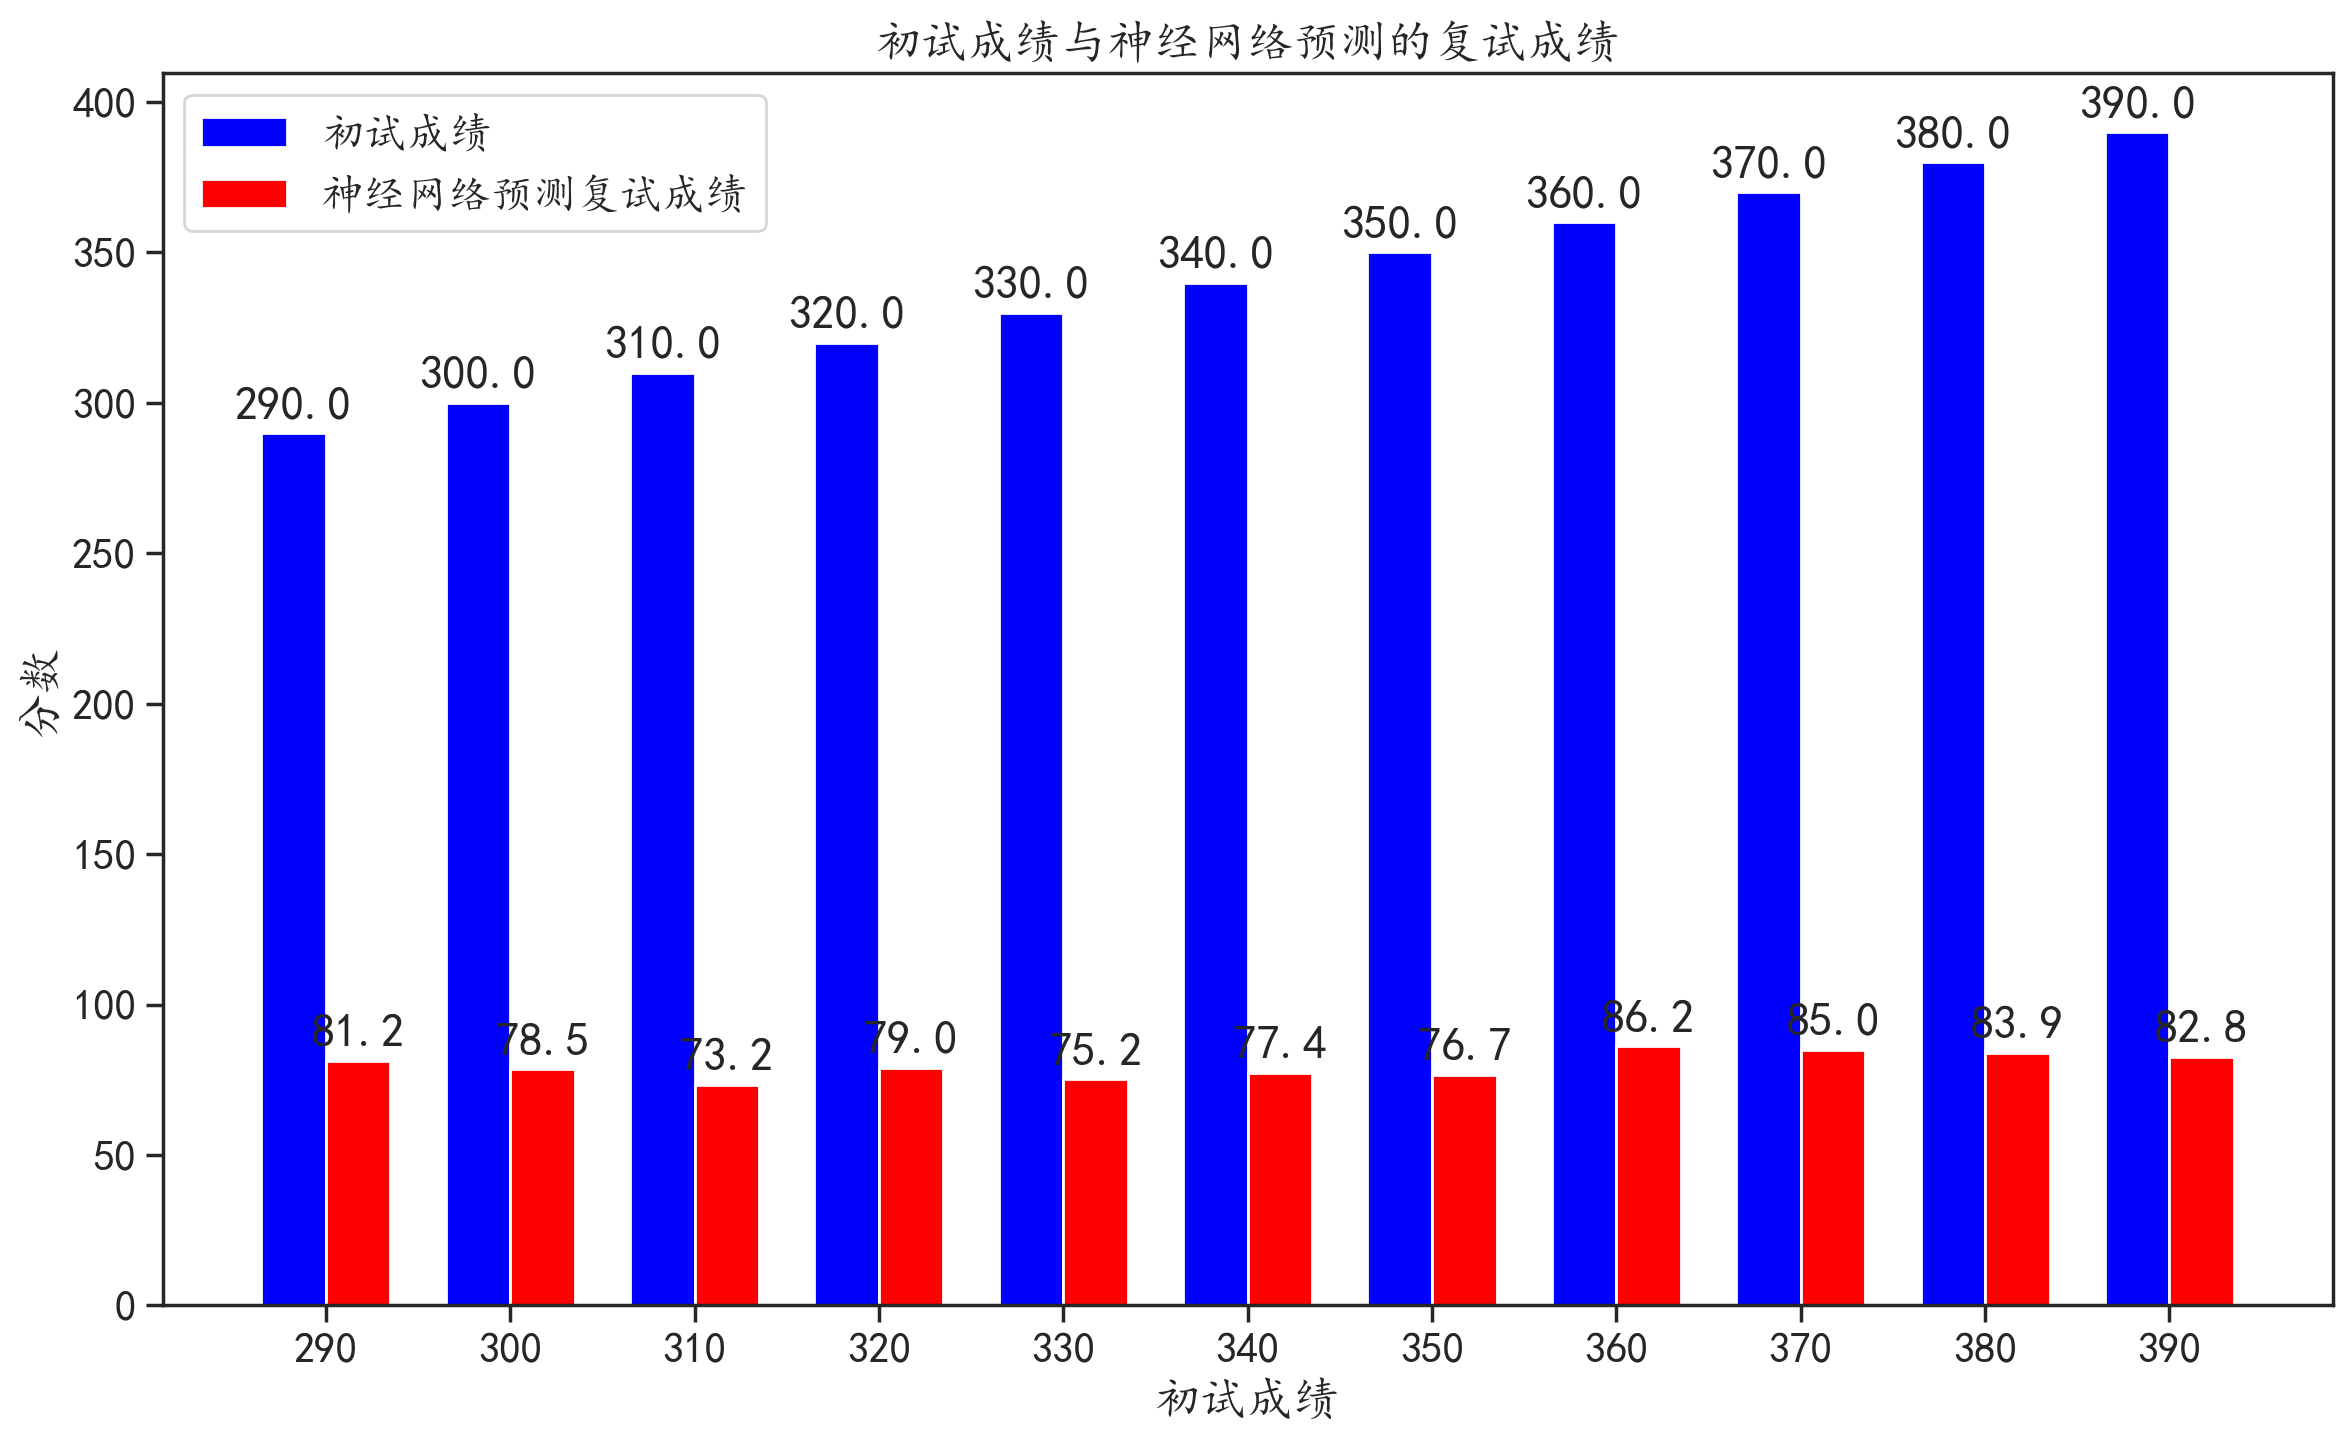

In [18]:
# Re-defining selected_prelim_scores since there was a reset
selected_prelim_scores = range(290, 391, 10)  # From 290 to 390 in steps of 10

# Scaling the selected_prelim_scores
scaled_selected_prelim_scores = scaler.transform(np.array(selected_prelim_scores).reshape(-1, 1))

# Converting to PyTorch tensor
scaled_selected_prelim_scores_torch = torch.tensor(scaled_selected_prelim_scores.astype(np.float32))

# Predicting using the trained neural network model
with torch.no_grad():
    predicted_retest_scores = net(scaled_selected_prelim_scores_torch).numpy().flatten()

# Preparing the data for plotting
selected_prelim_scores_df = pd.DataFrame({
    '初试成绩': selected_prelim_scores,
    '神经网络预测复试成绩': predicted_retest_scores
})

# Extracting values for plotting
nn_retest_scores_list = selected_prelim_scores_df['神经网络预测复试成绩'].tolist()

# Settings for the bars
bar_width = 0.35  # width of the bars
index = np.arange(len(selected_prelim_scores))

# Creating side-by-side bar plots for the new data
plt.figure(figsize=(14, 8))
bars1 = plt.bar(index, prelim_scores_list, bar_width, color='blue', label='初试成绩')
bars2 = plt.bar(index + bar_width, nn_retest_scores_list, bar_width, color='red', label='神经网络预测复试成绩')

# Adding labels and title
plt.xlabel('初试成绩')
plt.ylabel('分数')
plt.title('初试成绩与神经网络预测的复试成绩')
plt.xticks(index + bar_width / 2, prelim_scores_list)
plt.legend()

# Adding labels to the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

# Adding labels to the bars
add_labels(bars1)
add_labels(bars2)

# Showing the plot
plt.show()


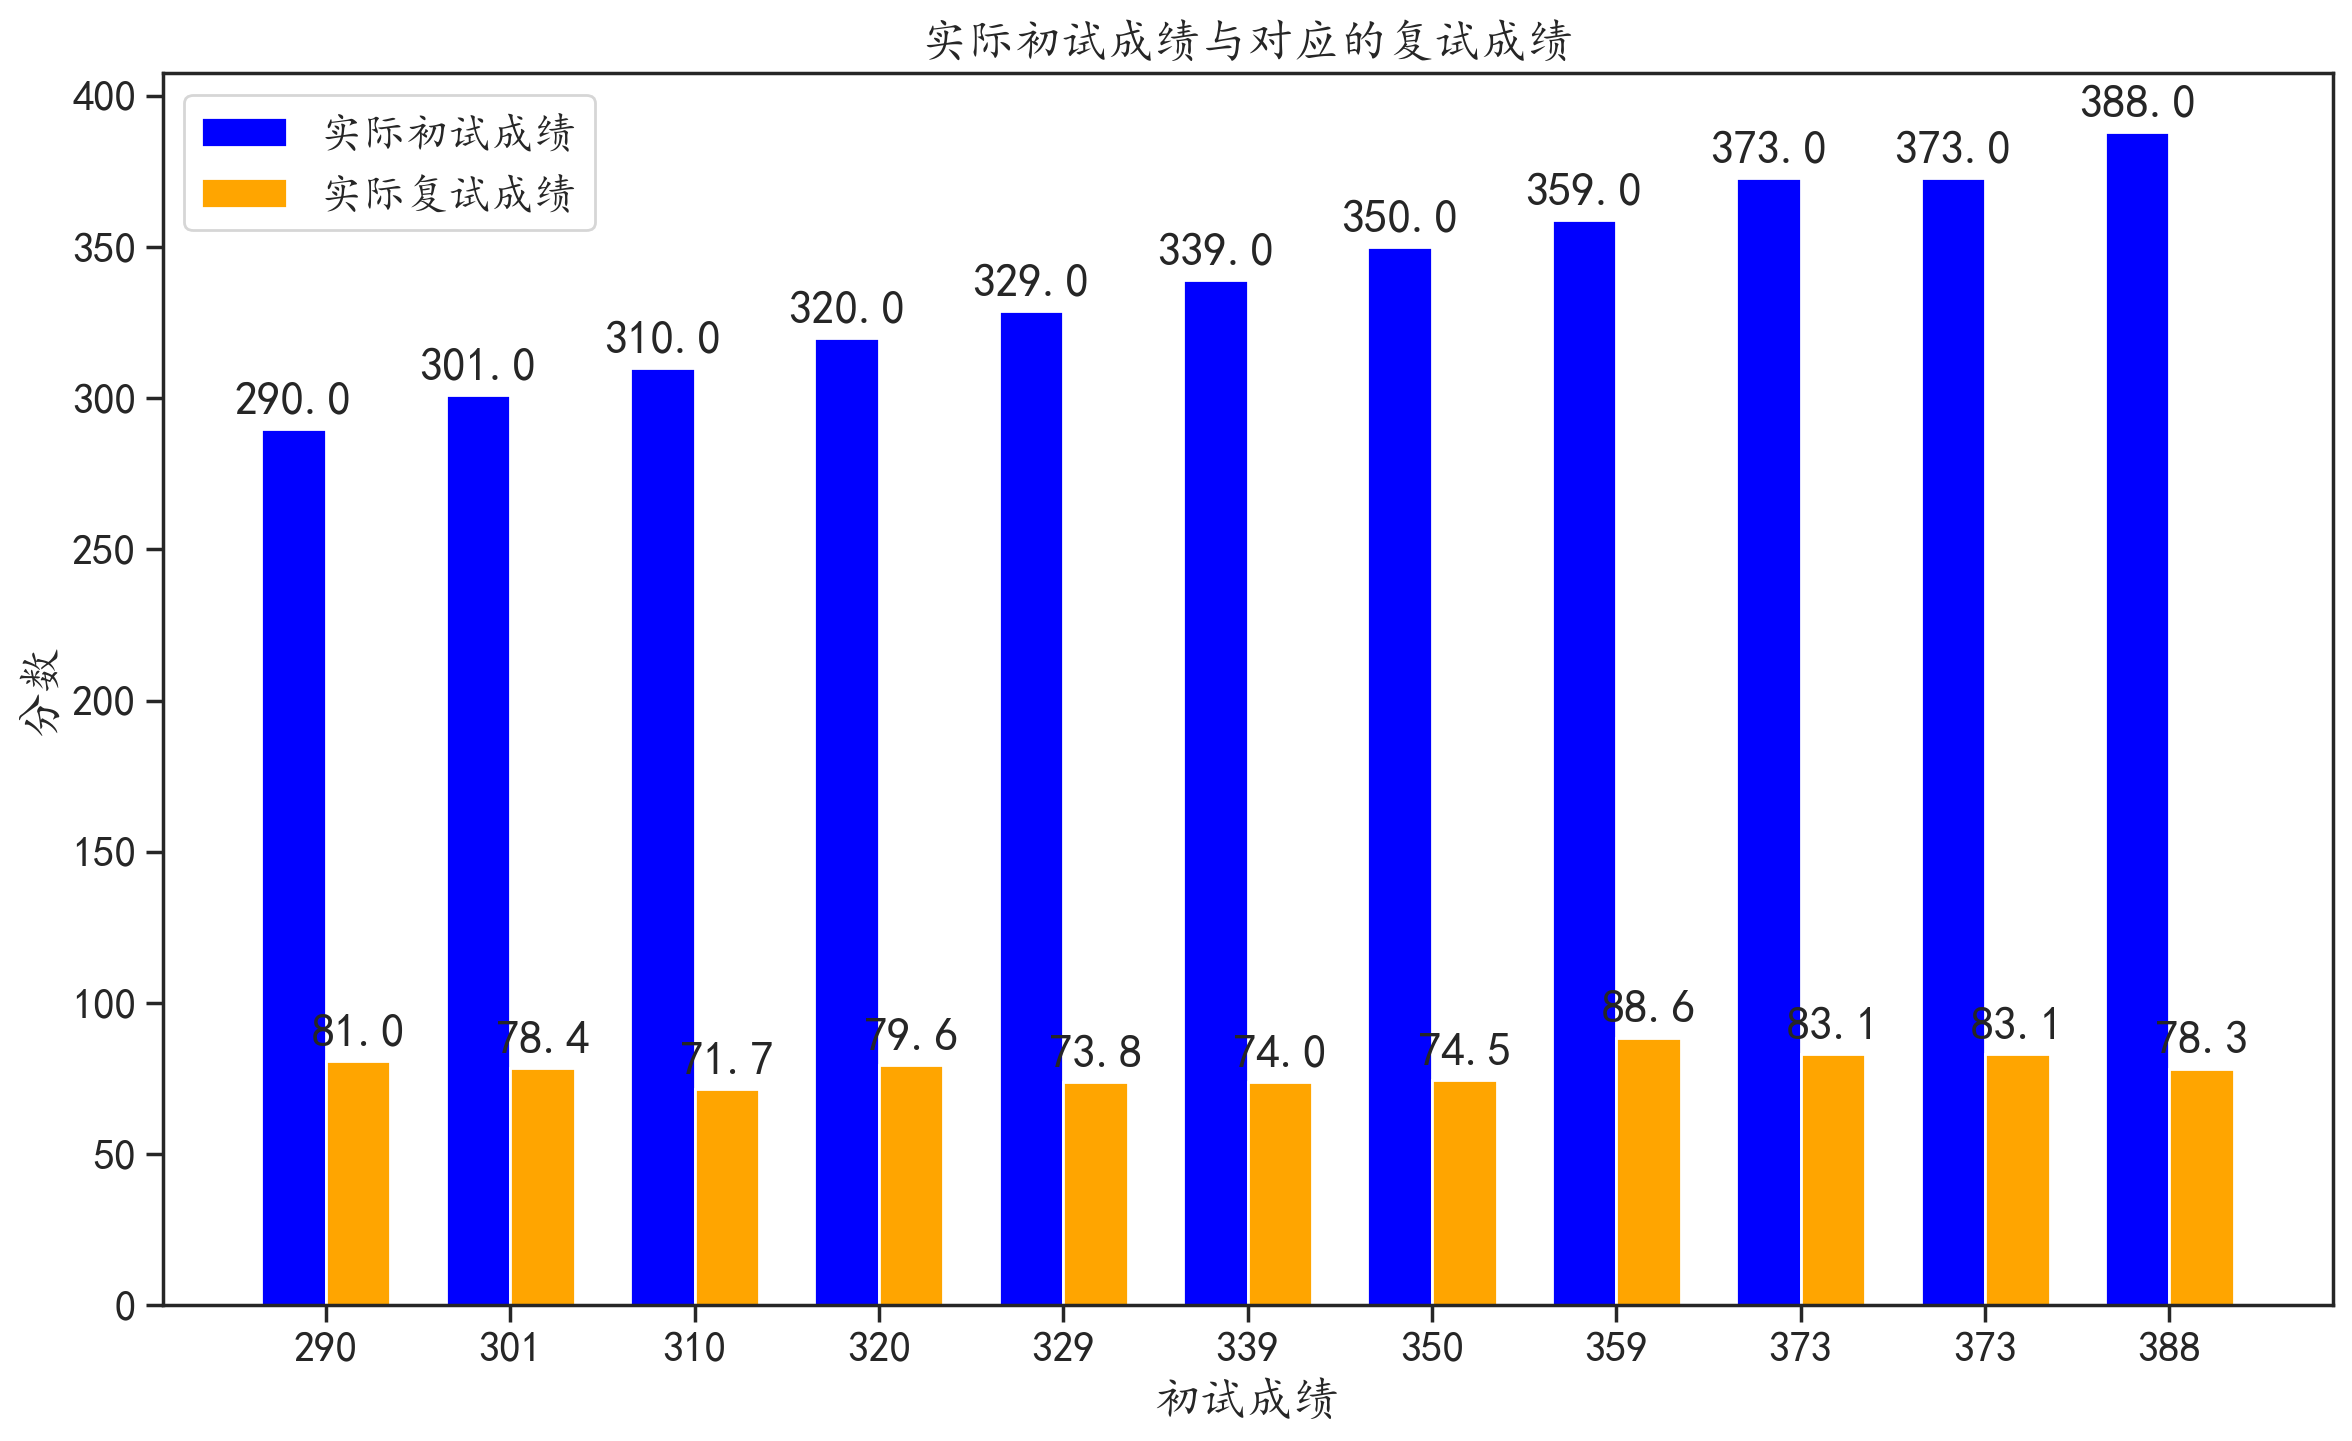

In [19]:
# Preparing the data for a bar chart comparing actual preliminary and retest scores

# Creating a function to find the closest available score if the exact score is not available
def find_closest_score(score, data, column_name):
    if score in data[column_name].values:
        return score
    else:
        # Search for the closest available score
        for i in range(1, 91):
            if score + i in data[column_name].values:
                return score + i
            elif score - i in data[column_name].values:
                return score - i
    return None

# Finding the closest available scores for the selected prelim scores
closest_scores = [find_closest_score(score, data, '初试成绩') for score in selected_prelim_scores]

# Extracting the actual retest scores for the closest scores
actual_retest_scores_closest = []
for score in closest_scores:
    actual_scores = data[data['初试成绩'] == score]['复试成绩'].tolist()
    actual_retest_scores_closest.append(np.mean(actual_scores) if actual_scores else 0)

# Creating side-by-side bar plots for actual preliminary vs retest scores
plt.figure(figsize=(14, 8))
bars1 = plt.bar(index, closest_scores, bar_width, color='blue', label='实际初试成绩')
bars2 = plt.bar(index + bar_width, actual_retest_scores_closest, bar_width, color='orange', label='实际复试成绩')

# Adding labels and title
plt.xlabel('初试成绩')
plt.ylabel('分数')
plt.title('实际初试成绩与对应的复试成绩')
plt.xticks(index + bar_width / 2, closest_scores)
plt.legend()

# Adding labels to the bars
add_labels(bars1)
add_labels(bars2)

# Showing the plot
plt.show()


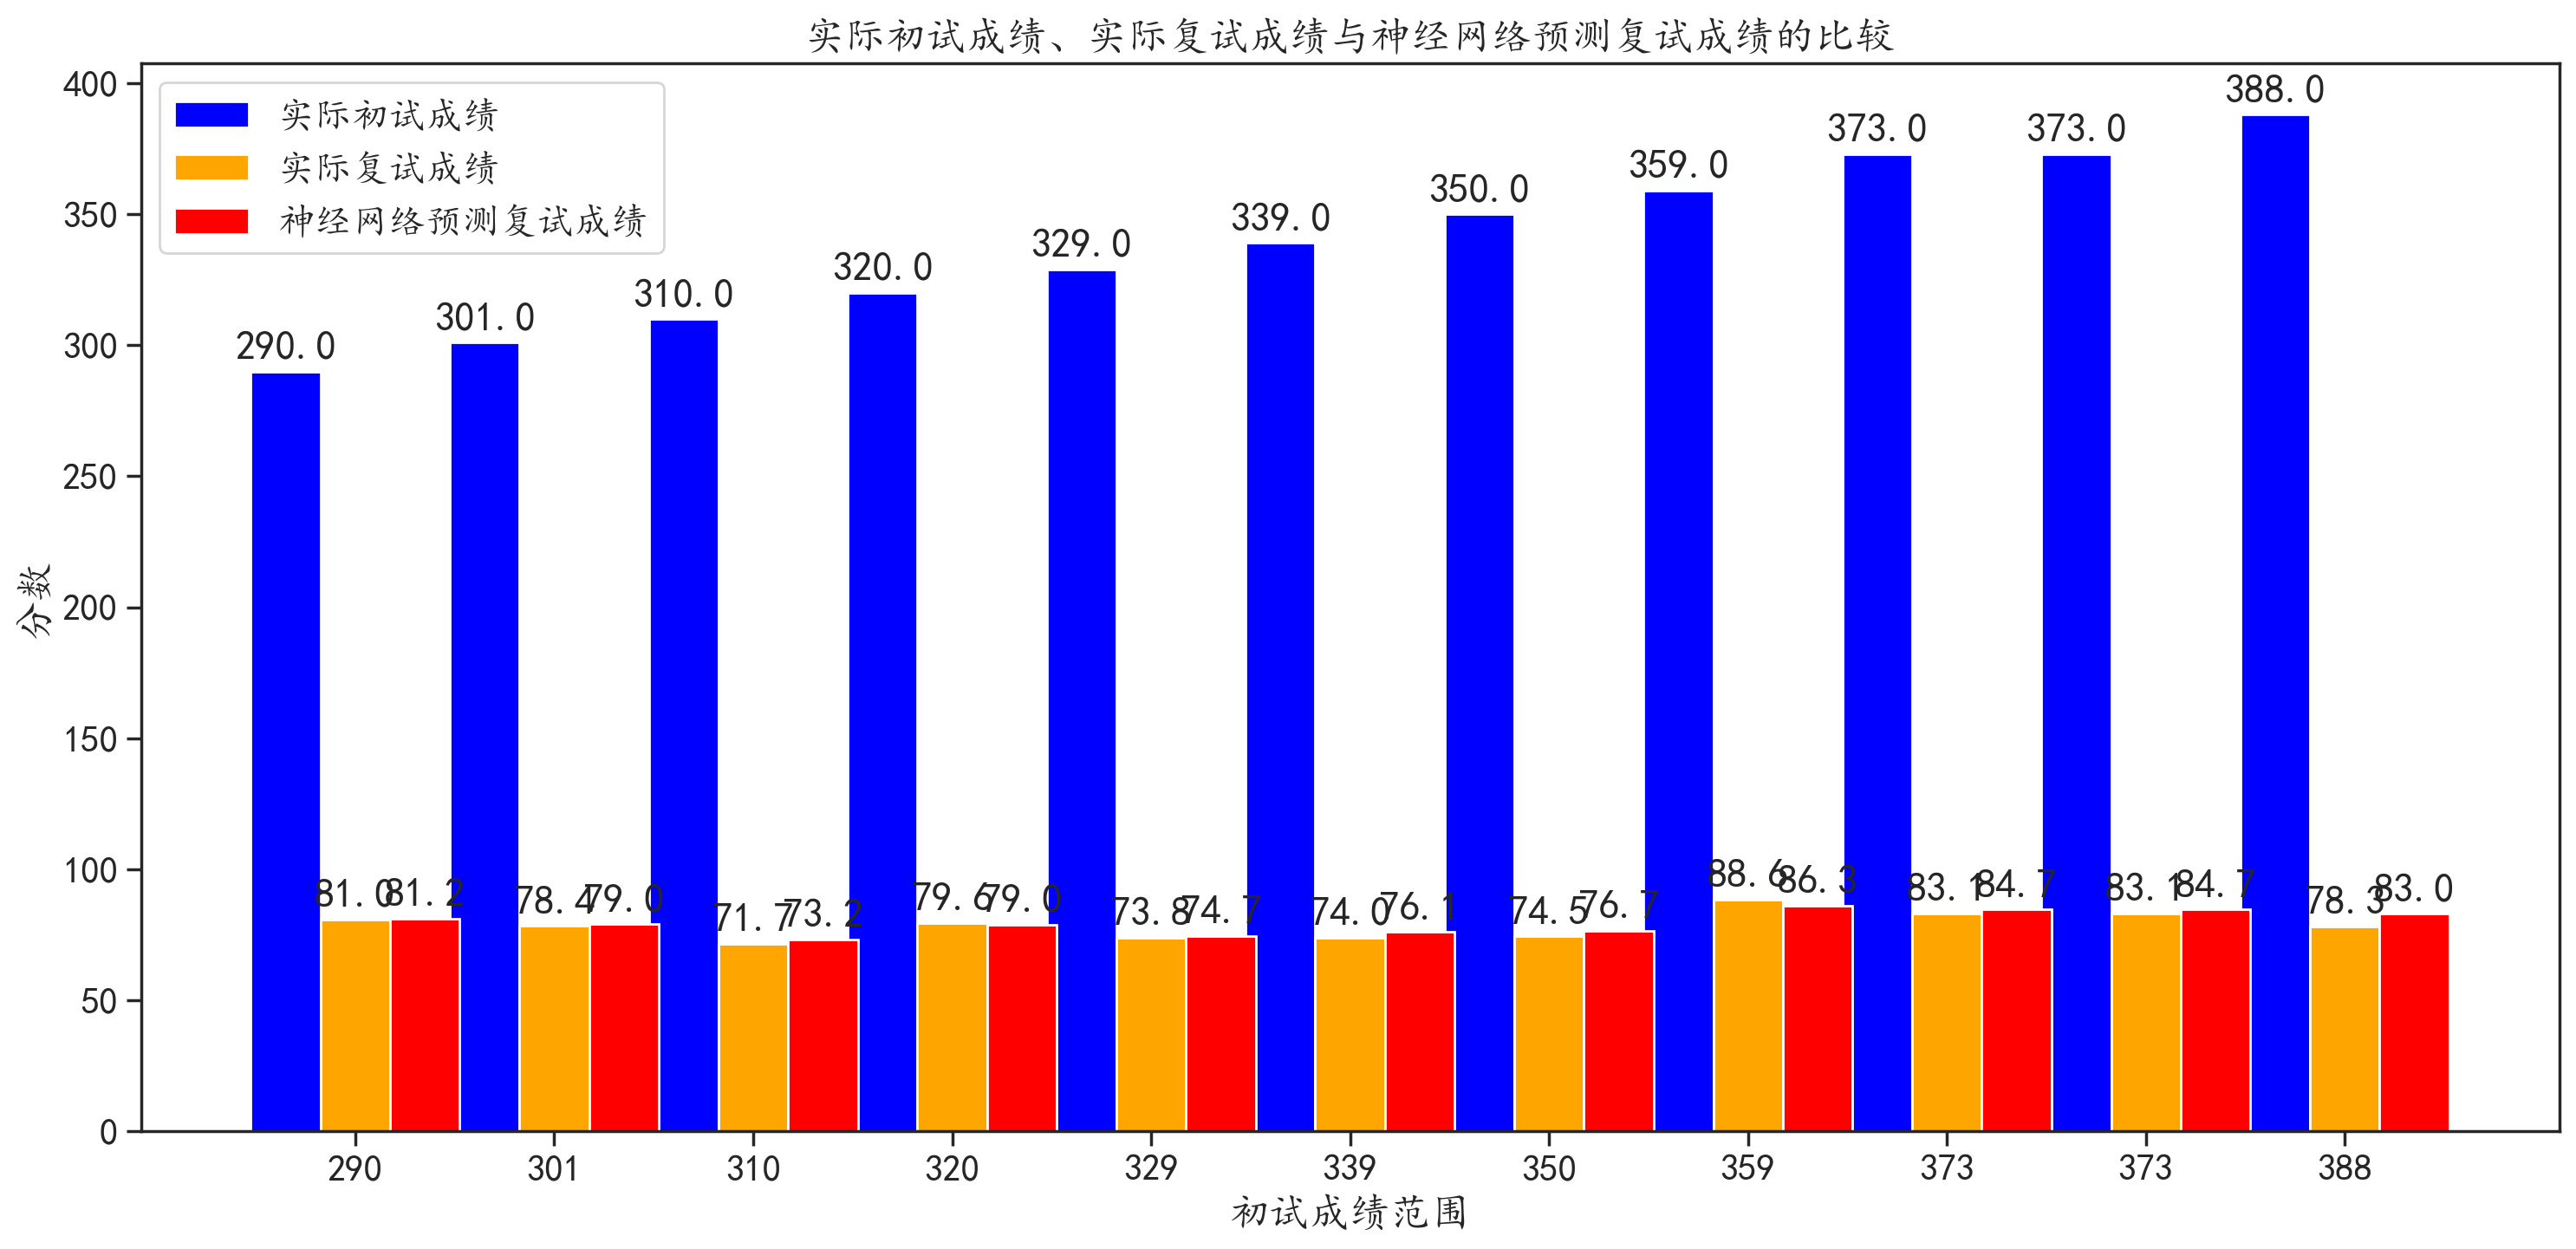

In [20]:
# Creating a side-by-side bar plot comparing actual preliminary, actual retest, and neural network predicted retest scores

# Preparing the neural network predicted scores for the closest available preliminary scores
scaled_closest_scores = scaler.transform(np.array(closest_scores).reshape(-1, 1))
scaled_closest_scores_torch = torch.tensor(scaled_closest_scores.astype(np.float32))

# Predicting using the trained neural network model
with torch.no_grad():
    nn_predicted_retest_scores = net(scaled_closest_scores_torch).numpy().flatten()

# Creating side-by-side bar plots
plt.figure(figsize=(18, 8))
bars1 = plt.bar(index - bar_width, closest_scores, bar_width, color='blue', label='实际初试成绩')
bars2 = plt.bar(index, actual_retest_scores_closest, bar_width, color='orange', label='实际复试成绩')
bars3 = plt.bar(index + bar_width, nn_predicted_retest_scores, bar_width, color='red', label='神经网络预测复试成绩')

# Adding labels and title
plt.xlabel('初试成绩范围')
plt.ylabel('分数')
plt.title('实际初试成绩、实际复试成绩与神经网络预测复试成绩的比较')
plt.xticks(index, closest_scores)
plt.legend()

# Adding labels to the bars
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Showing the plot
plt.show()


In [ ]:
# Calculating the composite score for each pair of initial and retest scores
# and finding the minimum initial score required to achieve a composite score of 65

# Function to calculate composite score
def calculate_composite_score(initial_score, retest_score):
    return (initial_score / 5) * 0.6 + retest_score * 0.4

# Target composite score
target_composite_score = 65

# Finding the minimum initial score required for each predicted retest score to achieve the target composite score
min_initial_scores_for_target = []
for predicted_retest_score in nn_predicted_retest_scores:
    initial_score = 0
    while initial_score <= 500:  # Assuming a maximum initial score of 500
        composite_score = calculate_composite_score(initial_score, predicted_retest_score)
        if composite_score >= target_composite_score:
            min_initial_scores_for_target.append(initial_score)
            break
        initial_score += 1

# Creating a DataFrame for visualization
composite_scores_df = pd.DataFrame({
    'Predicted Retest Score': nn_predicted_retest_scores,
    'Minimum Initial Score for Composite 65': min_initial_scores_for_target
})

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(composite_scores_df['Predicted Retest Score'], composite_scores_df['Minimum Initial Score for Composite 65'], marker='o')
plt.xlabel('Predicted Retest Score')
plt.ylabel('Minimum Initial Score for Composite 65')
plt.title('Minimum Initial Score Required to Achieve a Composite Score of 65 Based on Predicted Retest Score')
plt.grid(True)
plt.show()


In [26]:
# Function to calculate the composite score based on the formula provided
def calculate_composite_score(prelim_score, retest_score):
    return prelim_score / 5 * 0.6 + retest_score * 0.4

# Function to find the minimum preliminary score required to achieve a composite score of at least 65
def find_min_prelim_score_for_target_composite(net, scaler, target_composite_score=72.0, min_prelim_score=300):
    for prelim_score in range(min_prelim_score, 501):  # Assuming the max score is 500
        # Scale the prelim score
        scaled_prelim_score = scaler.transform(np.array([[prelim_score]]))
        scaled_prelim_score_torch = torch.tensor(scaled_prelim_score.astype(np.float32))

        # Predict the retest score using the neural network
        with torch.no_grad():
            predicted_retest_score = net(scaled_prelim_score_torch).numpy().item()

        # Calculate the composite score
        composite_score = calculate_composite_score(prelim_score, predicted_retest_score)

        # Check if the composite score meets the target
        if composite_score >= target_composite_score:
            return prelim_score, predicted_retest_score, composite_score

    return None, None, None

# Finding the minimum preliminary score required to achieve a composite score of at least 65
min_prelim_score, predicted_retest_score, composite_score = find_min_prelim_score_for_target_composite(net, scaler)
min_prelim_score, predicted_retest_score, composite_score



(335, 86.1858901977539, 74.67435607910156)

In [2]:
## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

epoch:   1 loss: 0.92892140
epoch:  26 loss: 0.02892956
epoch:  49 loss: 0.0012662361
年份: 2022, 预测杭电081200均分: 351.90
年份: 2023, 预测杭电081200均分: 353.40
年份: 2024, 预测杭电081200均分: 352.98


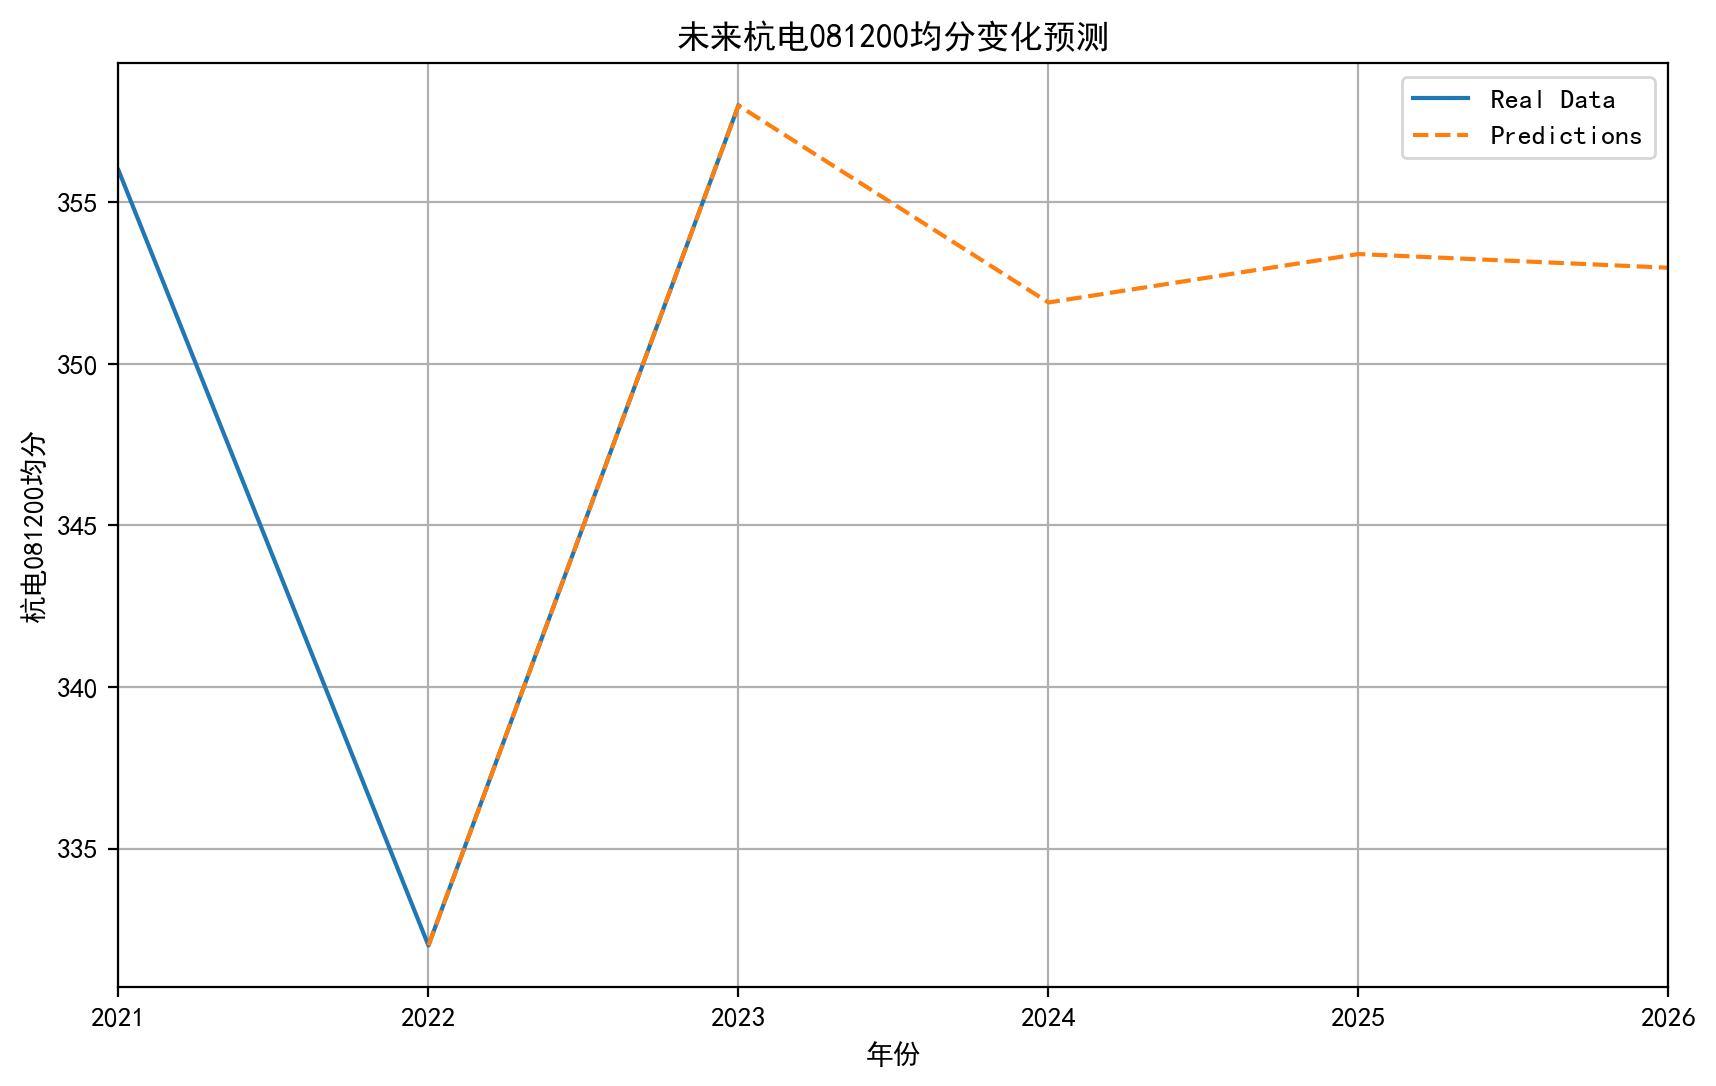

In [17]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
## 图像显示中文的问题


def predict(data, train_window, future_pred, label, epochs,lr):
    # 转换为 numpy 数组
    data_np = np.array(data[label]).reshape(-1, 1)

    # 数据归一化
    scaler = MinMaxScaler(feature_range=(-1, 1))
    data_normalized = scaler.fit_transform(data_np)

    # 转换为 PyTorch tensors
    data_normalized = torch.FloatTensor(data_normalized).view(-1)

    # 创建数据集
    def create_inout_sequences(input_data, tw):
        inout_seq = []
        L = len(input_data)
        for i in range(L-tw):
            train_seq = input_data[i:i+tw]
            train_label = input_data[i+tw:i+tw+1]
            inout_seq.append((train_seq, train_label))
        return inout_seq

    train_inout_seq = create_inout_sequences(data_normalized, train_window)

    # 定义 LSTM 模型
    class LSTM(nn.Module):
        def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
            super().__init__()
            self.hidden_layer_size = hidden_layer_size

            self.lstm = nn.LSTM(input_size, hidden_layer_size)

            self.linear = nn.Linear(hidden_layer_size, output_size)

            self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
                                torch.zeros(1, 1, self.hidden_layer_size))

        def forward(self, input_seq):
            lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
            predictions = self.linear(lstm_out.view(len(input_seq), -1))
            return predictions[-1]

    # 实例化模型
    model = LSTM()
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr)

    # 训练模型
    # epochs = 25

    for epoch in range(epochs):
        for seq, labels in train_inout_seq:
            optimizer.zero_grad()
            model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                                torch.zeros(1, 1, model.hidden_layer_size))

            y_pred = model(seq)

            single_loss = loss_function(y_pred, labels)
            single_loss.backward()
            optimizer.step()

        if epoch % 25 == 1:
            print(f'epoch: {epoch:3} loss: {single_loss.item():10.8f}')

    print(f'epoch: {epoch:3} loss: {single_loss.item():10.10f}')

    # 使用模型对整个数据集进行预测以创建拟合与真实数据对比图
    # 为预测做准备
    test_inputs = data_normalized[-train_window:].tolist()

    # 预测未来
    model.eval()
    for i in range(future_pred):
        seq = torch.FloatTensor(test_inputs[-train_window:])
        with torch.no_grad():
            model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                                torch.zeros(1, 1, model.hidden_layer_size))
            test_inputs.append(model(seq).item())
    # 将预测数据转换回原始规模
    actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:]).reshape(-1, 1))

    # 输出预测的未来私营企业乡村就业人员数值
    predicted_years = np.arange(data["年份"][-1] + 1 - train_window, data["年份"][-1] + 1 + future_pred)
    for year, population in zip(predicted_years, actual_predictions):
        print(f"年份: {year}, 预测{label}: {population[0]:.2f}")

    # 绘制图表
    plt.figure(figsize=(10, 6))
    plt.title(f'未来{label}变化预测')
    plt.xlabel('年份')
    plt.ylabel(f'{label}')
    plt.grid(True)
    plt.autoscale(axis='x', tight=True)
    
    # 绘制实际数据
    plt.plot(data["年份"], data[label], label='Real Data')
    
    # 绘制预测数据
    plt.plot(predicted_years, np.concatenate([data[label][-train_window:], actual_predictions.ravel()]), label='Predictions', linestyle='--')
    
    plt.legend()
    plt.show()
    
data1 = {
    "年份": [2021,2022,2023],
    "杭电081200均分": [356,332,358]
}

predict(data1, train_window=2, future_pred=3, label="杭电081200均分",epochs=50,lr=0.005)

epoch:   1 loss: 1.06578970
epoch:  26 loss: 0.03469080
epoch:  49 loss: 0.0018868562
年份: 2022, 预测杭电083500均分: 315.55
年份: 2023, 预测杭电083500均分: 315.36
年份: 2024, 预测杭电083500均分: 315.35


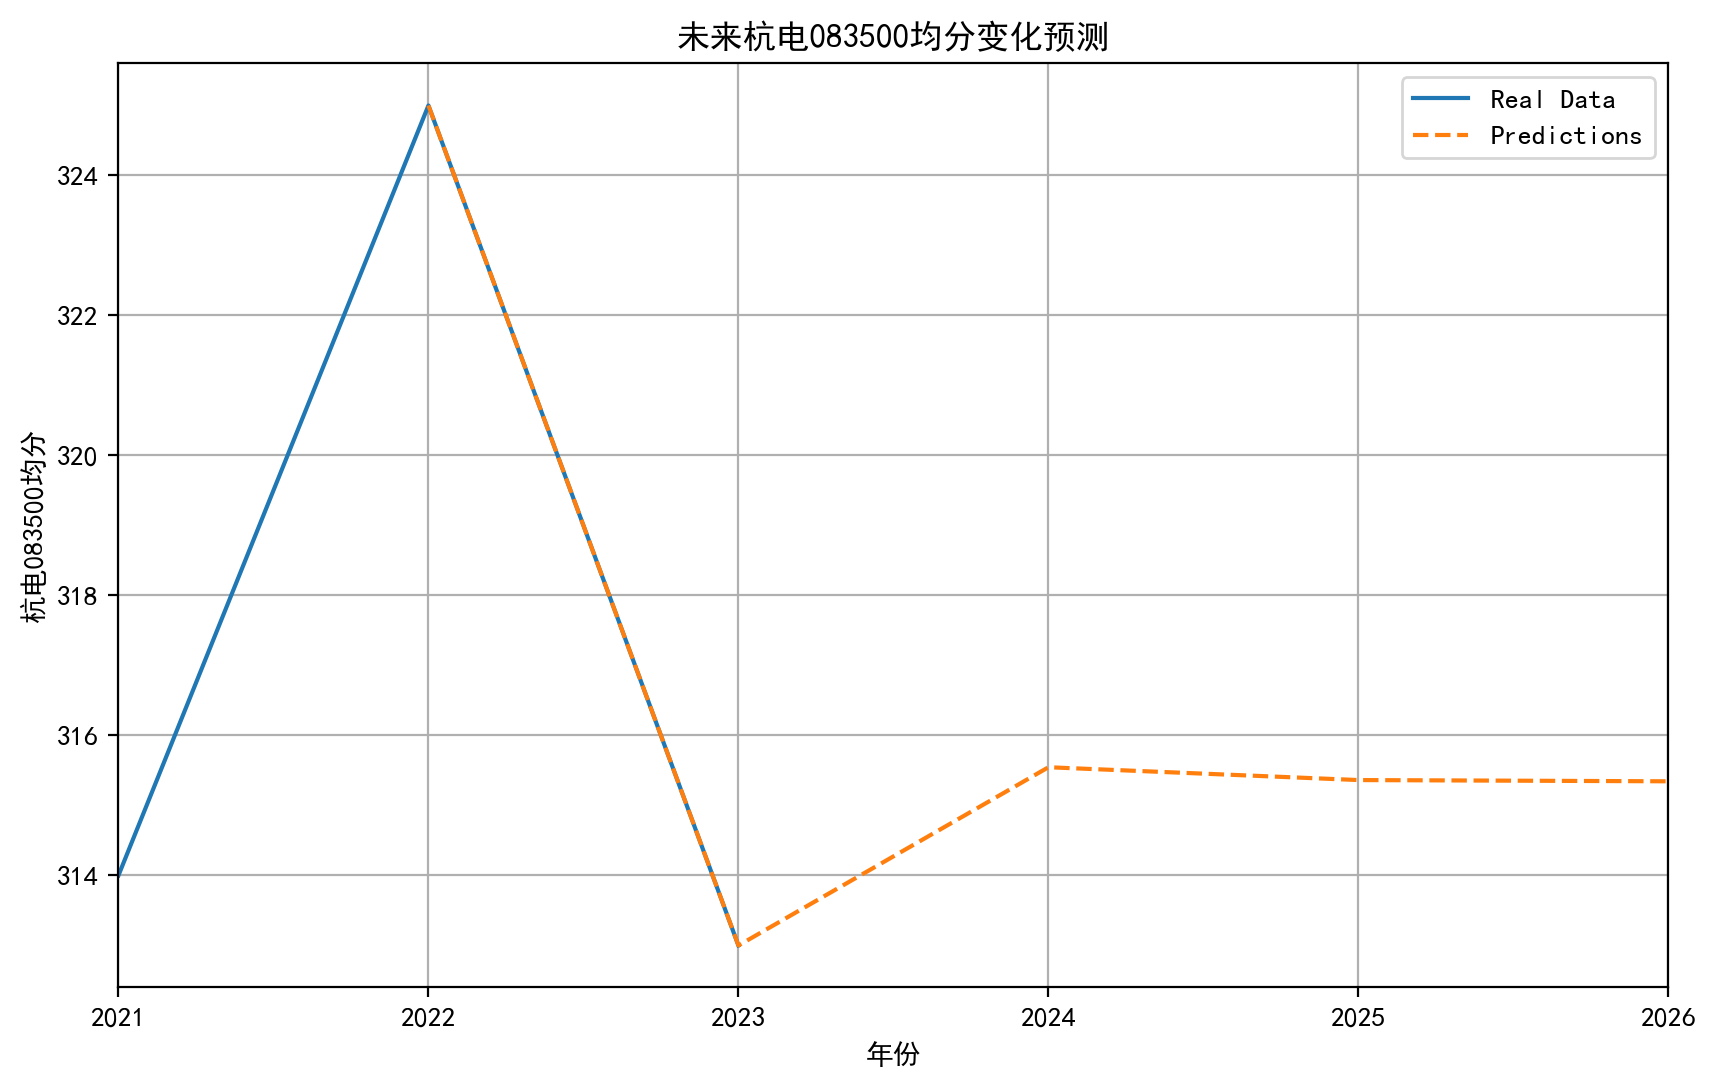

In [18]:
data2 = {
    "年份": [2021,2022,2023],
    "杭电083500均分": [314,325,313]
}

predict(data2, train_window=2, future_pred=3, label="杭电083500均分",epochs=50,lr=0.005)